__¿CÓMO SE CALCULA NUMÉRICAMENTE EL ÁREA DE UNA REGIÓN ENCERRADA POR UNA CURVA PARAMÉTRICA CERRADA $\mathbf{\vec{\gamma}}:[0,1] \rightarrow \mathbb{R}^2$ DADA POR $C=\left \{t \in \mathbb{R}: \vec{\gamma}(t)=X(t) \mathbf{\hat{i}}+ Y(t) \mathbf{\hat{j}},~0\le t \le 1,~\vec{\gamma}(0)=\vec{\gamma}(1) \right \}$ DONDE $X,Y: [0,1] \rightarrow \mathbb{R}$ SON FUNCIONES CONTINUAS PERO DIFERENCIABLES A TROZOS? LA CURVA $C$ PUEDE TENER "AUTO-INTERSECCIONES"__

$ \mathbf{Luis~Jiménez} \tag*{}$

$ \text{Agosto 2023 - Versión 1.0} \tag*{} $


__Resumen:__

En este mini-proyecto se calcula numéricamente el área de una región encerrada por una curva paramétrica cerrada $\mathbf{\vec{\gamma}}:[0,1] \rightarrow \mathbb{R}^2$, en el que puede ser una curva simple o puede tener auto-intersecciones. Para esto, se elabora un código en python que calcula numéricamente el valor del _winding number_ (WN). Primero, se encuentra el rectángulo $R \subset \mathbb{R}^2$ que encierra completamente a dicha curva, y se aplican dos métodos: el primero es dividiendo la región rectangular en $N_x \times N_y$ celdas en el que se calcula el WN en el centro de cada una de dichas celdas y se verifica que WN es distinto a cero, se acumula el número de puntos en un contador y se multiplica la fracción de estos puntos que satisface esta condición por el área de $R$, y el segundo es con la misma técnica que el anterior, pero mediante el método de Montecarlo, en lugar de dividir la región en celdas, se seleccionan aleatoriamente $N$ puntos independientes entre sí, con distribución de probabilidad uniforme en el rectángulo $R$ y se calcula su WN. Como objetivos secundarios se tiene la comparación de los resultados de estos métodos numéricos con los valores exactos (en los casos donde hacer esto sea posible) y obtener varias gráficas en dos dimensiones coloreadas por su WN. Esta respuesta les va a gustar especialmente a los que se están iniciando en el cálculo multivariable, cálculo vectorial, variable compleja, topología y métodos numéricos.


__Keywords:__ Curva paramétrica cerrada, integral de línea en una curva cerrada, _winding number_ (WN), producto cartesiano, método de Montecarlo.


---

__Disclaimer:__ yo, Luis Jiménez (el autor) dediqué mi mejor  esfuerzo  para  entregar   unos códigos de python  que  fueron   probados cuidadosamente  arrojando   resultados  correctos  para  un  amplio   rango  de  valores  de  entrada,   sin embargo,  debido  a  que  estos   scripts pueden no estar completamente libre  de  errores,  te  recomiendo   verificar  tu  trabajo  en  caso  de   inconsistencia  en  algún  resultado. El autor NO se hace responsable  por  cualquier  daño que  puede  resultar  de  errores, omisión  de  información  y  cualquier   valor  inexacto  producido  por  el uso  de  este programa. Este código viene sin  garantía. Por favor, úsalo bajo tu  propio riesgo. El objetivo de este  trabajo no es precisamente una publicación académica o un proyecto corporativo, sólo es elaborado con fines educativos e instructivos, diversión o entretenimiento, por lo que NO pretendo ser formal en el formato de este documento ni del código, así que NO seguiré las normas estandarizadas ni  convenios para elaborar código fuente en Python. Es completamente gratuito y de libre distribución.

---

__1. INTRODUCCIÓN:__

__1.1. Curvas paramétricas:__

Una curva paramétrica $^{\mathbf{[1]}}$ es la imagen $\vec{\gamma}:[a,b] \rightarrow \mathbb{R}^n$ generada por la siguiente función:

$\displaystyle \vec{\gamma}(t)=\sum_{i=1}^n f_i(t) \mathbf{\hat{e}}_i= f_1(t) \mathbf{\hat{e}}_1+f_2(t) \mathbf{\hat{e}}_2+\cdots + f_n(t) \mathbf{\hat{e}}_n \tag{1} $

donde los $\mathbf{\hat{e}}_i~~\mbox{para}~~i=1,2,...,n$ son los vectores unitarios en la coordenada $i$-ésima en el espacio en $\mathbb{R}^n$.

<img src="images/parametric_curve.png" width="300" height="150" style="margin:auto" />
<p style="text-align: center">
    Figura 1. Curva paramétrica en $\mathbb{R}^2$.
</p>

__1.2. Curva de Jordan:__ 

> Es una curva cerrada simple en el plano $\mathbb{R}^2$ el cual es la imagen $C$ de un mapeo continuo inyectivo de una circunferencia en el plano, es decir $\vec{\gamma}:S \rightarrow \mathbb{R}^2$. Es una curva plana que no es necesariamente suave o algebráica. Alternativamente, una curva de Jordan es la imagen de un mapeo continuo $\vec{\gamma}:[0,1] \rightarrow \mathbb{R}^2$ tal que $\vec{\gamma}(0)=\vec{\gamma}(1)$ y la restricción que $\vec{\gamma}~\mbox{en}~[0,1)$ es inyectiva. Las primeras dos condiciones dicen que $C$ es un lazo continuo, mientras que la última condición estipula que $C$ no tiene auto-intersecciones. En otras palabras, una curva de Jordan es usalmente definida como un subconjunto del plano el cual es homeomórfico al círculo unitario. En topología, un homeomorfismo (_homeo_ = misma y _morfo_ = forma) es una función $f$ de un espacio topológico a otro, que cumple con ser una función biyectiva continua y cuya inversa $f^{-1}$ también es continua. En este caso, los dos espacios topológicos se dicen homeomorfos.
Esta propiedad topológica hace que una curva de Jordan $C$ divida el plano $\mathbb{R}^2$ en exactamente dos dominios: (1) dentro de esta curva, el cual llamaremos $D$, y (2) fuera de la curva, el cual llamaremos complemento de $D$, o $\mathbb{R}^2 \setminus \left \{ D \right \}$. Esto significa que los puntos del plano caen dentro de dos clases: $P_O$, fuera de la curva, y $P_I$, dentro de la curva, tal que cualquier par de puntos de la misma clase puedan ser conectados por una curva (que no cruce la curva $C$), mientras que cualquier curva que conecte un par de puntos pertenecientes a diferentes clases, deben cruzar $C$ necesariamente $^{\mathbf{[2,~3]}}$.

<img src="images/jordan_transf.png" width="400" height="200" style="margin:auto" />
<p style="text-align: center">
    Figura 2. Mapeo en una curva de Jordan.
</p>


__1.3. Integrales de línea sobre curvas cerradas y Teorema de Green:__$^{\mathbf{[1]}}$

Sea $C$ una curva suave a trozos, simple y cerrada en un plano (específicamente, que pertenezca al conjunto de curvas de Jordan), positivamente orientada (es decir, en sentido antihorario), y sea $D$ la región encerrada por la curva $C$. Si $P, Q:D \rightarrow \mathbb{R}$ son funciones con derivadas parciales continuas en la región $D$, entonces

$\displaystyle \oint_C P\,dx+Q\,dy= \iint_D \left ( \frac{\partial Q}{\partial x}-\frac{\partial P}{\partial y} \right )
\,dxdy \tag{2}$

El Teorema de Green relaciona la integral de línea del campo vectorial $\vec{F} =P(x,y) \mathbf{\hat{i}}+ Q(x,y) \mathbf{\hat{j}}$ sobre el perímetro de la región $D$ y la integral doble sobre la misma región, siendo un caso particular del teorema de Stokes pero en $\mathbb{R}^2$.

Si el campo vectorial es $\vec{F}=(1/2)(-y \mathbf{\hat{i}}+ x \mathbf{\hat{j}})$, entonces, la siguiente integral de línea sobre la curva cerrada $C$ calcula el área de la región $D$:

$\displaystyle \frac{1}{2}\oint_C x\,dy-y\,dx\,=\,\pm \iint_D\,dxdy=A(D) \tag{3}$

donde se selecciona ($+$) si la curva se recorre en sentido antihorario y ($-$) si la curva se recorre en sentido horario.

<img src="images/closed_curve.png" width="300" height="150" style="margin:auto" />
<p style="text-align: center">
    Figura 3. Región de Jordan para aplicar el Teorema de Green.
</p>

__1.4. Polígonos:__

Un polígono es una curva cerrada especificada por una secuencia de $n$ puntos $\left \{\mathbf{P}_0,\mathbf{P}_1,\ldots,\mathbf{P}_{n-1} \right \}$ llamados "vértices", el cual la curva en sí misma consiste en segmentos de líneas rectas conectando consecutivamente estos vértices. Dichos vértices pertenecen al mismo plano.

<img src="images/polygon.png" width="300" height="150" style="margin:auto" />
<p style="text-align: center">
    Figura 4. Polígono.
</p>

Sean los puntos $\mathbf{P}_k=(x_k,y_k)$  para  $~k=0,1,2,...,n-1$, los vértices del polígono. También estos vértices se pueden escribir equivalentemente en el plano complejo mediante $z_k=x_k+iy_k~$. El polígono $C$ se puede representar mediante el siguiente conjunto $C=\left \{t \in \mathbb{R}: Z(t)= X(t)+iY(t), 0 \le t \le 1, Z(0)=Z(1) \right \}$, donde cada par de vértices consecutivos se recorren con trayectorias rectas en intervalos de tiempos iguales $\Delta t = t_{k+1}-t_k = 1/n$ para cada segmento y cuya ecuación paramétrica está dada en la siguiente expresión:

$Z(t)=\left \{ \begin{array}{ccc} z_0+n(z_1-z_0)t & \mbox{si} & 0 \le t <\frac{1}{n} \\
z_1+n(z_2-z_1)(t-\frac{1}{n}) & \mbox{si} & \frac{1}{n} \le t <\frac{2}{n} \\\vdots & \vdots & \vdots \\z_k+n(z_{k+1}-z_k)(t-\frac{k}{n}) & \mbox{si} & \frac{k}{n} \le t <\frac{k+1}{n} \\\vdots & \vdots & \vdots \\
z_{n-1}+n(z_n-z_{n-1})(t-1+\frac{1}{n}) & \mbox{si} & \frac{n-1}{n}\le t \le 1 \end{array} \right. \tag{4}$

donde $z_n=z_0$.

Las funciones reales $X,Y:[0,1] \rightarrow \mathbb{R}$ se obtienen aplicando parte real e imaginaria a la expresión anterior:

$ \left \{    \begin{array}{l}  X(t)= \Re \left ( Z(t) \right) \\  Y(t)= \Im \left ( Z(t) \right)   \end{array}   \right. \tag{5}$

Las derivadas $X'(t),Y'(t)$ se obtienen tomando partes real e imaginaria de:

$\displaystyle \frac{dZ}{dt}=n(z_{k+1}-z_k)~~~\mbox{si}~~~\frac{k}{n} \le t < \frac{k+1}{n} \tag{6}$

El área de un polígono simple (es decir, un polígono que no tiene auto-intersecciones) se calcula con la "fórmula de cordón de zapato" (_shoelace formula_) o también conocida como fórmula de área de Gauss o _surveyor's formula_, a partir de las coordenadas de los vértices del polígono, puede considerarse como un caso especial del Teorema de Green y viene dada por $^{\mathbf{[4]}}$:

$\displaystyle A = \frac{1}{2}\sum_{k=0}^{n-1} \begin{vmatrix} x_k & y_k \\ x_{k+1} & y_{k+1}\end{vmatrix}=\frac{1}{2}\sum_{k=0}^{n-1} (x_k y_{k+1}-x_{k+1} y_k) \tag{7}$

donde $(x_n,y_n)=(x_0,y_0)$.


__1.5. Winding number:__

El _winding number_ $^{\mathbf{[5, ~6]}}$ (o por su traducción en español "número de bobinado", sinceramente no encontré una traducción más precisa) de un lazo dada por la curva paramétrica $\vec{\gamma}:[0,1] \rightarrow \mathbb{R}^2 \setminus{ \left \{\mathbf{P} \right \}}$ alrededor de un punto $\mathbf{P}=(x_0,y_0)$ es simplemente el número de veces que el lazo $\vec{\gamma}$ viaja alrededor del punto $\mathbf{P}$ en sentido antihorario. Si el punto está fuera del lazo, este valor es cero. Es un número entero. Se define como $\color{blue}{^{[5]}}$:

$\displaystyle w_{\gamma}(\mathbf{P}) = \frac{1}{2\pi}\oint_C d \theta=\frac{\theta \left (\vec{\gamma}(1) \right ) - \theta \left (\vec{\gamma}(0) \right )}{2\pi} \tag{8a}$

<img src="images/windingnumber1.png" width="300" height="200" style="margin:auto" />
<p style="text-align: center">
    Figura 5. Ilustración del Winding number (cortesía página Wikipedia).
</p>

Específicamente se calcula con la siguiente integral de línea en una curva cerrada:

$\displaystyle w_{\gamma}(x_0,y_0) = \frac{1}{2\pi}\oint_C \frac{\left (X-x_0  \right )dY-\left (Y-y_0  \right )dX}{\left (X-x_0 \right )^2 + \left (Y-y_0 \right) ^2}= \\ \displaystyle \frac{1}{2\pi}\int_0^1 \frac{\left (X(t)-x_0  \right ) {Y}'(t)-\left (Y(t)-y_0  \right ) {X}'(t)}{\left (X(t)-x_0 \right )^2 + \left (Y(t)-y_0 \right) ^2}\,dt \tag{8b}$


__Demostración:__ Se puede deducir esta fórmula integral en variable compleja. Sea $z=X(t) + i Y(t) = z_0 + r \, e^{i\theta}$, siendo $r$ una función de $\theta$, que llamaremos $r=\rho(\theta)$ ya que $C$ es una curva. La variable $\theta$ varía de 0 a $2\pi n$ ya que la curva da $n$ vueltas alrededor del punto $z_0$. En este sentido, la curva cerrada $C$ viene dada por:

$C=\left \{ z \in \mathbb{C}: z = z_0+\rho(\theta)\,e^{i\theta}, 0 \le \theta \le 2\pi n, \rho(0)=\rho(2\pi n) \right \} \tag{9}$

diferenciando ambos lados de $z$

$z = z_0 + r\,e^{i\theta} ~~~ \Rightarrow ~~~ dz = e^{i\theta}dr + ir \,e^{i\theta} d \theta \tag{10a}$

dividiendo ambas ecuaciones:

$\left.  \begin{array}{r} dz=e^{i\theta}dr+ir\,e^{i\theta}d\theta \\ z- z_0 = r\,e^{i\theta} \end{array} \right \} ~~ \Rightarrow ~~ \displaystyle \frac{dz}{z-z_0}=\frac{dr}{r}+id\theta \tag{10b}$

integrando ambos lados en toda la curva cerrada $0 \le \theta \le 2\pi n$:
$\displaystyle \oint_C \frac{dz}{z-z_0}=\int_{\rho(0)}^{\rho(2\pi n)} \frac{dr}{r}+i \int_0^{2\pi n}d\theta \tag{10c}$

Dado que la curva $C$ es cerrada, entonces los puntos inicial y final coinciden en el mismo punto, es decir $\rho(0) = \rho(2\pi n)$, por lo tanto

$ \displaystyle \oint_C \frac{dz}{z-z_0}=2\pi i n ~~\Leftrightarrow~~ n=\frac{1}{2\pi i}  \oint_C \frac{dz}{z-z_0} \tag{11a}$

Sea $D$ la región que tiene a la curva $C$ como frontera. Si el punto $z_0 \not \in D$, entonces esta integral vale cero ya que la función del integrando es analítica en el dominio complejo en el exterior de $C$ (consecuencia de la fórmula integral de Cauchy o del teorema de los residuos de Cauchy $\color{blue}{^{[6]}}$). En el caso que $z_0 \in D$, entonces la integral es diferente de cero y tiene un valor entero $n > 0$ si la curva se mueve en sentido antihorario y entero $n < 0$ si la curva se mueve en sentido horario. Multiplicando el numerador y denominador del integrando de (11a) por la conjugada $\overline{z - z_0}$ tenemos que

$\displaystyle \oint_C \frac{\overline{(z-z_0)}dz}{(z-z_0) \overline{(z-z_0)}}= \oint_C \frac{(\bar{z}-\bar{z}_0)dz}{|z-z_0|^2} \tag{11b}$

Sustituyendo $z=X(t)+iY(t)$, y el punto $z_0=x_0+iy_0$ en el numerador de la integral anterior

$\text{numerador} = (\bar{z}-\bar{z}_0)dz = \left (X(t)-iY(t) - (x_0-iy_0) \right ) \left (dX(t)+idY(t) \right)= \\ \displaystyle  \left (X(t)-x_0 \right )dX + \left (Y(t)-y_0 \right ) dY + i \left (X(t)-x_0 \right )dY -i \left (Y(t)-y_0 \right ) dX \tag{12a}$

El denominador del integrando es simplemente el cuadrado de la distancia entre los puntos $\left ( X(t),Y(t) \right )~~~\text{y}~~~(x_0,y_0)$:

$\text{denominador}=|z-z_0|^2=\left (X(t)-x_0 \right )^2 + \left (Y(t)-y_0 \right) ^2 \tag{12b}$

Por lo tanto

$ \displaystyle \oint_C \frac{dz}{z-z_0}= \underbrace{ \oint_C \frac{\left (X(t)-x_0 \right )dX + \left (Y(t)-y_0 \right ) dY }{\left (X(t)-x_0 \right )^2 + \left (Y(t)-y_0 \right) ^2} }_{=\mathcal{I}_1} + i \underbrace{ \oint_C \frac{ \left (X(t)-x_0 \right )dY - \left (Y(t)-y_0 \right ) dX}{\left (X(t)-x_0 \right )^2 + \left (Y(t)-y_0 \right) ^2} }_{=\mathcal{I}_2}=2\pi i n \tag{13a}$

Es decir

$ \displaystyle \oint_C \frac{dz}{z-z_0}= \mathcal{I}_1 + i \mathcal{I}_2 = 2 \pi i n \tag{13b}$

Si se aplican partes imaginarias $\Im(~\cdot~)$ en ambos lados de la ecuación anterior se obtiene la fórmula para el _winding number_ presentada en el inicio de esta sección, la expresión que se quería demostrar:

$\displaystyle \Im(\mathcal{I}_1 + i \mathcal{I}_2) = \Im(2\pi i n) ~~~ \Rightarrow ~~~ \mathcal{I}_2 = 2\pi n ~~~ \Rightarrow ~~~ n := w_{\gamma}(x_0,y_0) = \frac{1}{2\pi} \mathcal{I}_2  \tag{14}$


Si se aplican partes reales $\Re(~\cdot~)$ ambos lados de la expresión anterior, se tiene que

$\Re (\mathcal{I}_1 + i \mathcal{I}_2) = \Re(2\pi i n) ~~~\Rightarrow~~~ \mathcal{I}_1 = 0 \tag{15a}$

$ \displaystyle \oint_C \frac{\left (X(t)-x_0 \right )dX + \left (Y(t)-y_0 \right ) dY }{\left (X(t)-x_0 \right )^2 + \left (Y(t)-y_0 \right) ^2} = 0 \tag{15b}$

También se hubiese obtenido el mismo resultado (15b) sabiendo que el campo vectorial del integrando de la integral anterior es el gradiente de la siguiente función potencial $f:\mathbb{R}^2 \rightarrow \mathbb{R}$:

$\displaystyle f(x,y)=\frac{1}{2} \ln \left ( \left (x-x_0 \right )^2 + \left (y-y_0 \right) ^2 \right )+K \tag{16}$

Donde $K \in \mathbb{R}$. Se puede definir arbitrariamente la constante de integración $K$ para que $f(x,y)$ sea igual a cero en la circunferencia unitaria centrada en $(x_0,y_0)$, esto es $K=0$. Resolviendo la integral de línea usando el Teorema Fundamental del Cálculo Integral (no depende de la constante $K$), resulta que esta es igual a cero:

$\displaystyle \oint_C \nabla f(x,y) \cdot d\vec{\gamma} = f \left (\vec{\gamma}(1) \right ) - f \left (\vec{\gamma}(0) \right ) = 0 \tag{17}$


Programas de gráficos por computadora tales como Adobe Illustrator y Adobe Photoshop usan el concepto de WN para rellenar curvas cerradas. En cada uno de estos programas rellenan el lazo utilizando la regla del WN diferente de cero para colorear todos los puntos interiores a la curva. También utilizan la regla de "WN impar" donde sólo se rellenan los puntos tales que WN sea impar $^{\mathbf{[5]}}$. En la siguiente figura $^{\mathbf{[5]}}$ se muestra un ejemplo:

<img src="images/windingnumber2.png" width="300" height="500" style="margin:auto" />
<p style="text-align: center">
    Figura 6. Ejemplo de valores del WN para una instancia de curva cerrada $^{\mathbf{[5]}}$.
</p>

En este pequeño proyecto calcularemos el área de curvas cerradas mediante el cálculo del _winding number_ para saber si un punto $\mathbf{P} = (x_0,y_0)$ está en el interior del lazo si WN es diferente de cero (siendo la parte exterior de la misma o el fondo, WN = 0). Para calcular el área se generan $N$ puntos $\mathbf{P}$ en una región que contenga la curva, determinísticamente con un mallado ordenado de $N_x \times N_y$ celdas (producto cartesiano) o también mediante la generación de puntos pseudo-aleatorios (método de Montecarlo). Se registran los aciertos (puntos dentro de la curva) en un contador y con esto, se puede calcular el área del interior de la curva. La curva puede tener "auto-intersecciones", así que el mapeo $\vec{\gamma}$ no necesariamente tiene que ser una función inyectiva. La integral del WN se calcula con el método de trapecios ```trapz()``` de la librería ```numpy``` o con ```quad()``` disponible en la librería ```scipy``` de python, y las derivadas las calcularemos numéricamente mediante diferencias finitas o mediante el método del paso complejo. Finalmente, se grafica la curva y se colorean los puntos de su interior con un color y los puntos del exterior con otro color con la librería ```matplotlib``` de python.

__1.6 Versión de Python utilizada:__

Para conocer la versión de python utilizada en este Jupyter Notebook se pueden usar cualquiera de las siguientes instrucciones:

In [3]:
import sys   # método 1, usando sys
print(sys.version)

3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]


In [4]:
!python -V   # este método sólo se puede hacer en Jupyter Notebook

Python 3.10.9


__1.7. Librerías:__ 

numpy (https://numpy.org/), scipy (https://scipy.org/), matplotlib (https://matplotlib.org/), pandas (https://pandas.pydata.org/), time, warnings.

In [ ]:
"""
Si no tienes instaladas ninguna de estas librerías, ejecutar este bloque de código
"""
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install pandas

__2. MÉTODOS DE CÁLCULO:__

__2.1. Diferencias finitas:__

Para calcular las derivadas de las funciones $X(t)$ y $Y(t)$ se requiere de un método numérico, dado que en la mayoría de ocasiones son difíciles de encontrar simbólicamente o analíticamente en la práctica. Aunque en la actualidad existen softwares potentes que realizan operaciones algebráicas de manera simbólica como Wolfram Mathematica, aunque hay otras excelentes alternativas como Maple que realizan la misma tarea y Matlab también tienen funciones que permiten realizar cálculos simbólicos. Python tiene a la librería sympy que no es tan madura como los softwares anteriores, pero igual tiene su valor intrínseco ya que está acoplada de forma nativa en las versiones recientes de Python y actualmente se encuentra en constante desarrollo. Hasta las obsoletas, pero legendarias, calculadoras HP, tienen integradas funciones que permiten hacer cálculos simbólicos que producen resultados bastante satisfactorios en la mayoría de los casos en los que no se necesita mucha exigencia computacional. Sin embargo, en este pequeño proyecto calcularemos las derivadas de forma numérica mediante el Método de Diferencias Finitas (FDM) y el Método del Paso Complejo (CSM, i.e. _Complex Step Method_). La aproximación más popular para la derivada numérica cuando $h \to 0$ viene dada por:

$\displaystyle \frac{df}{dt} \approx \frac{f(t+h)-f(t)}{h}+\mathscr{O}\left (h \right) \tag{18a}$

aunque hay otras versiones de orden superior, como la centrada de dos puntos:

$\displaystyle \frac{df}{dt} \approx \frac{f(t+h)-f(t-h)}{2h}+\mathscr{O}\left (h^2 \right) \tag{18b}$

o la centrada de cinco puntos y por supuesto, dado que requiere más evaluaciones, entonces se requiere mayor tiempo de cómputo:

$\displaystyle \frac{df}{dt} \approx \frac{-f(t+2h)+8f(t+h)-8f(t-h)+f(t-2h)}{12h}+\mathscr{O}\left (h^4 \right) \tag{18c}$

Todas estas formulas y su respectivo orden del error de truncación son obtenidas algebráicamente mediante la aplicación de series de Taylor a los términos $f(t + kh), ~k \in \mathbb{Z}$ $^{\mathbf{[7]}}$. Sin embargo, además del error de truncación, se encuentra el error de redondeo debido a una "cancelación catastrófica" de los términos del numerador, por este motivo, el tamaño de paso $h=\Delta t$ no puede ser muy pequeño, y debe ser seleccionando de tal forma que se minimice este error por cancelación.

Alternativamente se tiene el Método del Paso Complejo (CSM) el cual elimina completamente el error por redondeo debido a la cancelación de términos en el numerador y sólo queda el error de truncación, lo cual es una ventaja respecto a la derivada numérica tradicional y se puede seleccionar un tamaño de paso $h$ arbitrariamente pequeño y calcular la derivada de forma segura. La expresión de la derivada numérica CSM con error de truncación de segundo orden viene dado por $^{\mathbf{[8]}}$:

$\displaystyle \frac{df}{dt} \approx \frac{\Im \left (f(t+ih) \right)}{h}+\mathscr{O}\left (h^2 \right) \tag{19}$

la demostración de la formula anterior se obtiene aplicando partes imaginarias a la serie de Taylor de $f(t+ih)$, despejando $f'(t)$ y dividiendo por $h$ ambos lados:

$\displaystyle f(t + ih) = f(t) + f'(t) ih + \frac{1}{2!} f''(t)(ih)^2 + \frac{1}{3!} f'''(t)(ih)^3+ \cdots \tag{20}$

sin embargo, para que el método CSM funcione correctamente, la función compleja $f(t+ih) = u(t,h) + i\,v(t,h)$ (con $u,v:\mathbb{R}^2 \rightarrow \mathbb{R}$ diferenciables) debe satisfacer las ecuaciones de Cauchy-Riemann para todo $t \in [0,1]$ y $h \to 0$, condición necesaria y suficiente para que la función sea diferenciable en el plano complejo, es decir, tiene que ser una función analítica $^{\mathbf{[6]}}$. Las expresiones en este caso vienen dadas por:

$\displaystyle \left \{ \begin{array}{l} \displaystyle \frac{\partial u}{\partial t} = \frac{\partial v}{\partial h} \\ \displaystyle \frac{\partial u}{\partial h} = -\frac{\partial v}{\partial t} \end{array} \right . \tag{21}$

__Ejemplo práctico en python:__ en el siguiente ejemplo se comparan los métodos FDM y CSM de orden de truncación de segundo orden usando la función de prueba $f(t)=\sin^2(t)$ calculando la derivada numérica en $t=\pi/4$. La derivada exacta es $f'(t)=\sin(2t)$ por lo tanto $f'(\pi/4)=1$. Se evalúa el error absoluto en función del tamaño de paso $h$ para cada caso y se grafican los resultados en escala logarítmica.

calculated Truncation order CSM = 2.0001


computation time for both methods:
elapsed time FDM = 0 sec
elapsed time CSM = 6.2e-05 sec

machine epsilon= 2.2e-16


,Abs error FDM,Abs error CSM
h,,
0.1,0.0067,0.0067
0.01,6.7e-05,6.7e-05
0.001,6.7e-07,6.7e-07
0.0001,6.7e-09,6.7e-09
1e-05,7.1e-11,6.7e-11
1e-06,5.7e-11,6.7e-13
1e-07,1.4e-09,6.7e-15
1e-08,7.8e-09,2.2e-16
1e-09,2.8e-08,2.2e-16


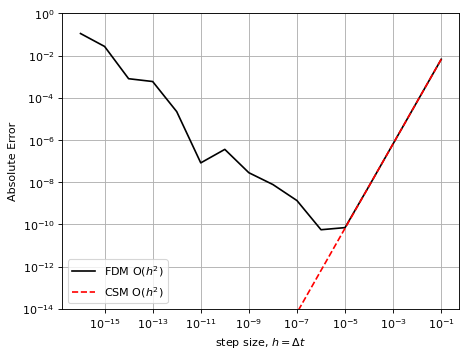

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import time

# reajustamos el tamaño de la figura
plt.rcParams['figure.dpi'] = 80  # también otra opción sería 'figure.figsize'

# funcion test para probar los métodos
fun = lambda t: np.sin(t)**2

# derivada exacta de 'fun'
dfun = lambda t: np.sin(2*t)

# función que calcula la derivada
# numérica por diferencias finitas
# usando ambos métodos FDM clásico en
# números reales y CSM (método en el
# plano complejo)
def finitediff(fun, t, h, method):
    if method=='fdm':
        dfdt = (fun(t+h) - fun(t-h)) / (2*h)

    else:
        dfdt = np.imag(fun(t + 1j*h)) / h

    return dfdt

# definimos el array de los tamaños de paso h
log10_h = np.linspace(-1,-16,16)
h = 10**log10_h

# valor de prueba
t0 = np.pi/4
Tstart = time.time()
dfdt_t0_num_fdm = finitediff(fun, t0, h, 'fdm')
Tend = time.time()
T_fdm = (Tend - Tstart)/len(h)

Tstart = time.time()
dfdt_t0_num_csm = finitediff(fun, t0, h, 'csm')
Tend = time.time()
T_csm = (Tend - Tstart)/len(h)

dfdt_t0_exact = dfun(t0)

# calculamos los errores absolutos
E_fdm = np.abs(dfdt_t0_num_fdm - dfdt_t0_exact)

E_csm = np.abs(dfdt_t0_num_csm - dfdt_t0_exact)

# encontramos el orden del error
# de truncación de forma numérica
coef = np.polyfit(np.log10(h[h>1e-8]), np.log10(E_csm[h>1e-8]), 1)

print('calculated Truncation order CSM = %.4f' % coef[0])

print('\n\ncomputation time for both methods:')
print('elapsed time FDM = %.2g sec' % T_fdm)
print('elapsed time CSM = %.2g sec' % T_csm)
print('\nmachine epsilon= %.2g' % sys.float_info.epsilon)

#graficamos el error absoluto de cada
# método en función del tamaño de paso
# h y también lo tabulamos en un
# pandas.DataFrame
plt.cla()
plt.plot(h, E_fdm, 'k-')
plt.plot(h, E_csm, 'r--')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-14, 1)
plt.legend(['FDM O($h^2$)', 'CSM O($h^2$)'])

plt.xlabel('step size, $h = \Delta t$')
plt.ylabel('Absolute Error')
plt.grid(which='both')

pd.options.display.float_format = '{:,.2g}'.format
df = pd.DataFrame({'h':h,
                   'Abs error FDM':E_fdm,
                   'Abs error CSM':E_csm})
df.set_index('h', inplace=True)
df

__Analisis:__ De acuerdo a los resultados mostrados anteriormente, se tiene que el método FDM (línea negra) tiene un tamaño de paso óptimo de $h_{opt}=10^{-6}$ en el que se obtiene un error absoluto mínimo de $6 \times 10^{-11}$, y para tamaños de paso más pequeños que $h_{opt}$ empieza aparecer el error por redondeo debido a la cancelación de factores en el numerador, y es especialmente importante para $h$ menores a $10^{-13}$. Por otro lado, el método CSM (línea roja discontinua) no tiene el problema del error por redondeo, y sólo tiene el error por truncación que se reduce a medida que el tamaño de paso sea cada vez más pequeño. La pendiente de esta línea en escala logarítmica es 2, calculado mediante ajuste con mínimos cuadrados usando ```numpy.polyfit```, que coincide con el orden de truncación teórico.

__2.2. Cálculo del área de la región encerrada por una curva cerrada a través del Método del producto cartesiano o del "barrido de todo el mallado":__

Sea $C= \left \{t \in \mathbb{R}: \vec{\gamma}(t)=X(t) \mathbf{\hat{i}} +Y(t) \mathbf{\hat{j}}, 0 \le t \le 1, \vec{\gamma}(0)=\vec{\gamma}(1) \right \}$ una curva cerrada contenida en la región rectangular $[x_{\min},x_{\max}] \times[y_{\min},y_{\max}] \subset \mathbb{R}^2$, donde

$ \left \{ \begin{array}{l} \displaystyle x_{\min}=\min_{t \in [0,1]} X(t) \\ \displaystyle x_{\max}=\max_{t \in [0,1]} X(t) \\ \displaystyle y_{\min}=\min_{t \in [0,1]} Y(t) \\ \displaystyle y_{\max}=\max_{t \in [0,1]} Y(t) \\ \end{array} \right. \tag{22}$

esta región rectangular se divide en $N = N_x \times N_y$ celdas, el cual se verifica si los puntos centrales de cada una de estas celdas están contenidas en el interior de la curva paramétrica mediante el cálculo del _winding number_. Se registra en un contador ```count```, el número de puntos que están en el interior de la curva, y finalmente, el área de la curva paramétrica se calcula con la fórmula:

$\displaystyle A= \frac{\text{count}}{N}(x_{\max}-x_{\min})(y_{\max}-y_{\min}) \tag{23}$

__Ejemplo práctico en python:__ en el siguiente ejemplo, se considera el caso del cálculo del área de una elipse centrada en el origen de coordenadas con parámetros $a=2,~b=1$ mediante el producto cartesiano barriendo un mallado de $20 \times 10$ celdas. Los puntos interiores a la elipse se marcan en color rojo y Los exteriores en color amarillo. Un punto está en el interior si se verifica la desigualdad $(x/a)^2+(x/b)^2<1$, pero más adelante en la edición de la clase en python se calcula la integral del _winding number_ en lugar de verificar la desigualdad. El Valor exacto en este caso es $A=\pi ab=2 \pi$.

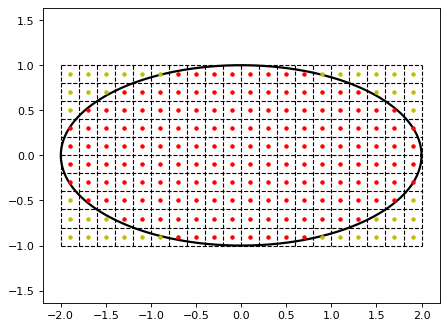


Area = 6.40000
Area (exact) = 6.28319
Fraction = 0.80000
Percent relative deviation= 1.86 perc



In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 80  # también otra opción sería 'figure.figsize'

Nx, Ny = 20, 10  # definimos el mallado
w = 2*np.pi
a, b = 2, 1 # parámetros de la elipse
NI_t = 1000 # número de subintervalos en t

t = np.linspace(0, 1, NI_t + 1)

# ecuaciones paramétricas de la elipse
X = lambda t: a*np.cos(w*t)
Y = lambda t: b*np.sin(w*t)
x, y = X(t), Y(t)

xmin, xmax = min(x), max(x)
ymin, ymax = min(y), max(y)
xmM = [xmin, xmax]
ymM = [ymin, ymax]

# definimos los valores de x, y
# equispaciados
x_array = np.linspace(xmin, xmax, Nx + 1)
y_array = np.linspace(ymin, ymax, Ny + 1)

# buscamos los puntos centrales de cada
# celda
xm = (x_array[1:] + x_array[:-1]) / 2
ym = (y_array[1:] + y_array[:-1]) / 2

plt.plot(x, y, 'k-', lw=2)

# verificamos si los puntos de los centros
# de las celdas están en el interior de la
#elipse
count = 0
for x0 in xm:
    for y0 in ym:
        if (x0/a)**2 + (y0/b)**2<1:
            mcolor = 'r.'
            count += 1
        else:
            mcolor = 'y.'
        plt.plot([x0], [y0], mcolor, ms=6)

# graficamos el mallado
for xi in x_array:
    plt.plot([xi, xi], ymM, 'k--', lw=1)

for yi in y_array:
    plt.plot(xmM, [yi, yi], 'k--', lw=1)

plt.axis('equal')
plt.show()
Area_rectangle = (xmax - xmin)*(ymax - ymin)
AllCells = Nx*Ny
fraction = count / AllCells
Area = fraction*Area_rectangle
Area_exact = np.pi*a*b
print('\nArea = %.5f' % (Area))
print('Area (exact) = %.5f' % (Area_exact))
print('Fraction = %.5f' % (fraction))
print('Percent relative deviation= %.2f perc\n' % (100*np.abs(Area-Area_exact)/Area_exact))

__2.3. Cálculo del área de una región encerrada por una curva cerrada a través del Método de Montecarlo:__

En este caso, los $N$ puntos $(x_0,y_0)$ son generados aleatoriamente con distribución de probabilidad uniforme, es decir, cada punto es
$x_0 \sim U[x_{\min},x_{\max}]$, $y_0 \sim U[y_{\min},y_{\max}] $. Luego se verifica si el punto $(x_0,y_0)$ está encerrado por la curva paramétrica, es decir, si $w_{\gamma}(x_0,y_0)$ es diferente de cero, y en caso de ser cierto, se almacena en el contador ```count```, y finalmente el área se calcula con la ecuación (23).

__Ejemplo práctico en python:__ en el siguiente ejemplo, se considera el caso del cálculo del área de una elipse centrada en el origen de coordenadas con parámetros $a=2,~b=1$ explicada anteriormente mediante el método de Montecarlo usando 1000 puntos pseudoaleatorios.

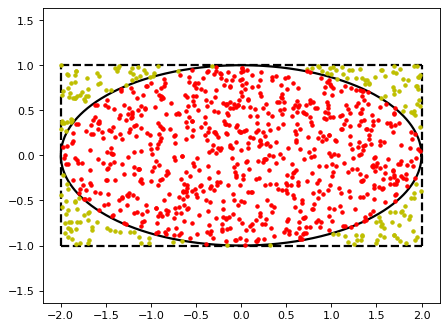


Area = 6.31200
Area (exact) = 6.28319
Fraction = 0.78900
Percent relative deviation= 0.46 perc



In [3]:
N_MC = 1000

plt.plot(x,y,'k-', lw=2)

for xi in xmM:
    plt.plot([xi, xi], ymM, 'k--', lw=2)

for yi in ymM:
    plt.plot(xmM, [yi, yi], 'k--', lw=2)

count = 0
for i in range(N_MC):
    U = np.random.rand(2)
    x0 = xmin + (xmax - xmin)*U[0]
    y0 = ymin + (ymax - ymin)*U[1]
    if (x0/a)**2 + (y0/b)**2<1:
        mcolor = 'r.'
        count += 1
    else:
        mcolor = 'y.'
    plt.plot([x0], [y0], mcolor, ms=6)

plt.axis('equal')
plt.show()
fraction = count / N_MC
Area = fraction*Area_rectangle

print('\nArea = %.5f' % (Area))
print('Area (exact) = %.5f' % (Area_exact))
print('Fraction = %.5f' % (fraction))
print('Percent relative deviation= %.2f perc\n' % (100*np.abs(Area-Area_exact)/Area_exact))

__3. EDICIÓN DE LA CLASE__  ```AreaParametricCurve```:

Esta clase resuelve el área encerrada por una curva paramétrica mediante la integral de linea en la curva cerrada, también utilizando la fuerza bruta mediante el método del producto cartesiano y el método de Montecarlo calculando el _winding number_ en cada punto. Se tienen los siguientes métodos:

$\text{clase}~~ \left \{  \begin{array}{ll}  \mbox{AreaParametricCurve()} & (\text{constructor}) \\ \text{windingnumber()} \\ \text{area_of_parametric_curve()} \\ \text{wnplot()} \\ \text{calculate_area()}  \\ \text{print()}    \end{array} \right . \tag*{}$

1. ```AreaParametricCurve(PCname, NI_t, derivative_method, derivative_dt, size, N_MC, plot_colors)```: el método constructor para crear una instancia de la clase. Tiene los siguientes parámetros:

```PCname```  $\color{gray}{\textrm{[str]}}$: es el nombre de la curva paramétrica introducida como una cadena de caracteres. Pueden ser las siguientes opciones:

* ```PCname = 'circle'```: es una circunferencia centrada en el origen de coordenadas y el parámetro dado en ```PCparameters``` es $R$ (el radio, y su valor por defecto es 1).

* ```'PCname = ellipse'```: es una elipse centrada en el origen de coordenadas $(x/a)^2+(y/b)^2=1$ y los parámetros definidos en ```PCparameters``` es la tupla $(a, b)$.

* ```PCname = 'hypocycloid'```: es una hipocicloide $^{\mathbf{[9]}}$ y los parámetros definidos en ```PCparameters``` es la tupla $(a, b)$. Las ecuaciones paramétricas son:

$\left \{    \begin{array}{l} \displaystyle  X(t) = \delta \cos (\omega t) + b \cos \left (\frac{\delta}{b} \omega t \right )  \\ \displaystyle Y(t) = \delta \sin(\omega t) - b \sin \left (\frac{\delta}{b} \omega t \right )  \end{array} \right . \tag{24}$

donde $0 \le t \le 1,~\omega=2\pi,~\delta = a-b$

* ```PCname = 'petals'```: es una curva de pétalos y los parámetros definidos en ```PCparameters``` es la tupla $(n, a)$. Las ecuaciones paramétricas son:

$\left \{    \begin{array}{l} X(t)=a \sin (n \omega t) \cos(\omega t )  \\ Y(t)=a \sin (n \omega t) \sin(\omega t)  \end{array} \right . \tag{25}$

donde $0 \le t \le 1,~\omega=2\pi$

* ```PCname = 'heart'```: es una curva de un corazón. En ```PCparameters``` se introduce un parámetro $a$, opcional (tiene un valor de 1 por defecto). Las ecuaciones paramétricas son:

$\left \{    \begin{array}{l} X(t) = 16a\sin^3 ( \omega t)  \\ Y(t) = a \left ( 13 \cos(\omega t) - 5 \cos(2 \omega t) -  2 \cos(3\omega t) - \cos(4 \omega t) \right)  \end{array} \right . \tag{26}$

donde $0 \le t \le 1,~\omega=2\pi$

* ```PCname = 'star5'```: es una curva de estrella de cinco puntas. En ```PCparameters``` se introduce un parámetro $a$, opcional (tiene un valor de 1 por defecto). Las ecuaciones paramétricas son:

$\left \{  \begin{array}{l} X(t) = a\left ( 9 \sin(2\omega t) + 5\sin(3 \omega t) \right)   \\ Y(t) = a \left (9 \cos(2\omega t) - 5\cos(3\omega t) \right )  \end{array} \right . \tag{27}$

donde $0 \le t \le 1,~\omega=2\pi$

* ```PCname = 'lemniscate'```: es la curva lemniscate de Bernoulli que tiene forma de un ocho "8" o un infinito $\infty$. Más información en la URL de Wikipedia $^{\mathbf{[10]}}$. En ```PCparameters``` se introduce un único parámetro $a$. Las ecuaciones paramétricas son:

$\left \{    \begin{array}{l} \displaystyle X(t) = \frac{a \cos(\omega t)}{1 + \sin^2(\omega t)}   \\ \displaystyle Y(t)= \frac{a \cos(\omega t) \sin(\omega t)}{1 + \sin^2(\omega t)}  \end{array} \right . \tag{28}$

donde $0 \le t \le 1,~\omega=2\pi$

* ```'PCname = general_form'```: curva paramétrica con una fórmula general con seis parámetros $^{\mathbf{[11]}}$ dados por la tupla $(A, B, C, D, j, k, m, n)$ introducidos en ```PCparameters```. Las constantes $A,B,C,D \in \mathbb{R}$, sin embargo las potencias $j,k,m,n$ deben ser enteras mayores o iguales a cero. Las ecuaciones paramétricas son:

$\left \{  \begin{array}{l} X(t) = \left ( \cos(A \omega t) \right)^j - \left ( \cos(B \omega t) \right )^m   \\ Y(t) = \left ( \sin(C \omega t) \right )^k - \left ( \sin(D \omega t) \right )^n   \end{array} \right . \tag{29}$

donde $0 \le t \le 1,~\omega=2\pi$

* ```PCname = 'polygon'```: es un polígono cuyos vértices se introducen en el argumento ```PCparameters``` como  una lista de tuplas de $n$ puntos $[(x_0,y_0),~(x_1,y_1), \ldots , ~(x_{n-1}, y_{n-1})]$

```PCparameters```  $\color{gray}{\textrm{[tuple, float, int, list]}}$: tupla de constantes de la curva paramétrica. Por favor leer el argumento ```PCname```.


```NI_t```  $\color{gray}{\textrm{[int]}}$: número de subintervalos de la partición de la variable paramétrica $t$ en el intervalo $t \in [0,1]$. Por defecto es ```NI_t=1000```.

```derivative_method```  $\color{gray}{\textrm{[str]}}$: es el método utilizado para calcular la derivada numérica. Son dos:

* ```derivative_method = 'csm'```: método de paso complejo (Complex Step Method) de orden $\mathscr{O}(h^2)$. Este es el método por defecto.

* ```derivative_method = 'fdm'/'fdm2'```: método de diferencias finitas real clásico (Finite Difference Method) de orden $\mathscr{O}(h^2)$ centrada de dos puntos.

* ```derivative_method = 'fdm4'```: método de diferencias finitas real clásico (Finite Difference Method) de orden $\mathscr{O}(h^4)$ centrada de cinco puntos.

```derivative_dt```  $\color{gray}{\textrm{[float]}}$: es el tamaño de paso $h = \Delta t$ utilizado para calcular la derivada numérica. Para ```method = 'csm'``` el valor por defecto es $\Delta t = 1 \times 10^{-15}$ y para ```method = 'fdm'``` el valor por defecto es $\Delta t = 1 \times 10^{-6}$.

```size```  $\color{gray}{\textrm{[tuple]}}$: es la configuración del número de celdas o mallado en la región $[x_{\min},x_{\max}] \times [y_{\min},y_{\max}]$, $(N_x, N_y)$, donde $N_x$ es el número de subintervalos en el eje $x$ y $N_y$ es el número de subintervalos en el eje $y$. Indica la resolución del mallado para calcular el WN en el método del producto cartesiano o "barrido del mallado". Tiene una tupla por defecto (100, 100).

```N_MC```  $\color{gray}{\textrm{[int, float]}}$: es el número de simulaciones del método de Montecarlo, en caso de utilizarse este método. Por defecto tiene un valor de 10000.

```plot_colors```  $\color{gray}{\textrm{[dict]}}$: son los colores del gráfico, puntos internos y externos a la curva en el método de Montecarlo, introducido en una estructura de datos de diccionario de la forma:

```plot_colors={'line':cl, 'inside':ci, 'outside':co}```

donde ```cl```, ```ci```, ```co``` son los colores de la curva, los puntos internos y puntos externos, respectivamente. Puede admitir los siguientes colores: ```'k'``` (negro), ```'b'``` (azul), ```'r'``` (rojo), ```'g'``` (verde), ```'y'``` (amarillo), ```'c'``` (cyan), ```'w'``` (blanco).

2. ```windingnumber(x0, y0)```: calcula el _winding number_ (WN) dado un punto $(x_0,y_0)$. Los dos argumentos son $x_0$ y $y_0$ como [float] y retorna WN [int].

3. ```area_of_parametric_curve()```: calcula el área encerrada por la curva paramétrica utilizando la fórmula de cálculo de área mediante el Teorema de Green dada en la Ecuación (3), o la Ecuación (7) para los polígonos. Sólo es válida si la curva paramétrica es una curva de Jordan (sin auto-intersecciones).

4. ```wnplot(P, n_arrows, size)```: grafica la curva paramétrica en el plano cartesiano con su respectiva orientación mediante flechas y calcula el _winding number_ para varios puntos. Los argumentos son los siguientes:

```P```  $\color{gray}{\textrm{[list, str]}}$: se puede usar de dos formas, la primera, si P se introduce como la cadena de caracteres ```P='all'``` (valor por defecto), calcula el _winding number_ (WN) para todos los puntos internos de la curva paramétrica de todos los puntos en el producto cartesiano $[x_{\min},x_{\max}] \times [y_{\min},y_{\max}]$. Los puntos internos son los puntos medios de las celdas, y el número de celdas se define como tupla en el argumento ```size```. La representación gráfica es la curva paramétrica y las áreas son rellenadas por una paleta de colores, donde cada color representa un WN diferente. Retorna una tabla ```pandas.dataframe``` en el que se tabula el área en función del WN, se calcula el área total encerrada por la curva paramétrica y el tiempo de ejecución.
La segunda forma de usar este argumento, puede ser una lista de tuplas de $n$ puntos $\left [(x_0,y_0),(x_1,y_1),...,(x_{n-1},y_{n-1}) \right ]$, entonces grafica la curva paramétrica con su respectiva orientación (flechas) y grafica cada uno de estos puntos indicando el valor de su respectivo WN, también retorna una tabla ```pandas.dataframe``` donde se tabula las coordenadas de cada uno de estos puntos y su respectivo WN. 

```n_arrows```  $\color{gray}{\textrm{[int]}}$: es el número de flechas tangentes a la curva paramétrica que indican su orientación. El valor por defecto es 0. Si se introduce como 0 o None, no grafica ninguna flecha.

5. ```calculate_area(N, method, plot)```: aplica el método del producto cartesiano (barrido del mallado) o el método de Montecarlo (mediante la generación de puntos pseudoaleatorios) para calcular el área encerrada por la curva paramétrica, en la región $[x_{\min},x_{\max}] \times [y_{\min},y_{\max}]$. Los aciertos (en el interior de la curva), son los puntos donde WN es distinto de cero y los grafica con "puntos" con el color definido en el diccionario ```plot_colors['inside']``` y los puntos fuera de la curva con el color definido en ```plot_colors['outside']```. Retorna el área encerrada por la curva paramétrica y el tiempo de ejecución. Los argumentos de esta función son:

```N```  $\color{gray}{\textrm{[tuple, int, float]}}$:

Caso #1: producto cartesiano o barrido del mallado ```method='grid'```. ```N``` es la configuración del número de celdas o mallado en la región $[x_{\min},x_{\max}] \times [y_{\min},y_{\max}]$, $(N_x, N_y)$, donde $N_x$ es el número de subintervalos en el eje $x$ y $N_y$ es el número de subintervalos en el eje $y$. Indica la resolución del mallado para calcular el WN.

Caso #2: método de Montecarlo ```method='montecarlo'```. ```N``` es el número de simulaciones de Montecarlo, introducido como un número entero [int] o [float].

```method```  $\color{gray}{\textrm{[str]}}$:
* ```'method = grid'```: aplica el método del producto cartesiano o barrido del mallado.
* ```'method = montecarlo'```: aplica el método de Montecarlo.

```plot```  $\color{gray}{\textrm{[bool]}}$: es ```True``` si se desea graficar los resultados y ```False``` si no se desea graficar.

6. ```print()```: aplica el método mágico ```__str__``` reservado para invocarse cuando se ejecuta la instrucción ```print()``` a la instancia de la clase. Retorna una impresión de texto con los resultados de las ecuaciones (3) y (7) y el resultado con ambas simulaciones (area mediante el barrido del mallado del producto cartesiano y método de montecarlo) y sus respectivos tiempos de ejecución. El único argumento es:

```APCclass```  $\color{gray}{\textrm{[AreaParametricCurve instance]}}$: instancia creada con el constructor.

In [4]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import time
import warnings

plt.rcParams['figure.dpi'] = 60  # también otra opción sería 'figure.figsize'
warnings.simplefilter('ignore')


class AreaParametricCurve:
    def __init__(self, PCname,
                 PCparameters=None,
                 NI_t = 1000,
                 derivative_method=None,
                 derivative_dt=None,
                 size=(100, 100),
                 N_MC=10000,
                 plot_colors=None):

        self.PCname = PCname
        self.PCparameters = PCparameters

        self.t = np.linspace(0, 1, NI_t + 1)
        if derivative_method is None:
            self.derivative_method = 'csm'

        else:
            self.derivative_method = derivative_method

        self.derivative_dt = derivative_dt

        self.PCeq = self.parametric_curve(
                         PCname,
                         PCparameters)

        self.size = size
        self.N_MC = int(N_MC)

        if plot_colors is None:
            self.plot_colors ={'line':'k',
                       'inside':'r',
                       'outside':'y'}
        else:
            self.plot_colors = plot_colors
        self.n_sig_digits_print = 6


    def round_by_sig_digits(self, x,
                            n=None):
        # función utilizada para
        # redondear según número de
        # dígitos significativos
        if n is None:
            n = self.n_sig_digits_print

        if isinstance(x,float) or \
           isinstance(x,int):
            if x > 0:
                L = np.log10(x)
                if L > 0:
                    n_int = np.ceil(L)
                else:
                    n_int = np.floor(L)+1
                n_dec = int(n - n_int)
                y = round(x, n_dec)
                return y
            else:
                return x

        elif isinstance(x, list) or \
             isinstance(x, tuple):
            y = (self.round_by_sig_digits(x[i], n)  for i in range(len(x)))
            return y

        else:
            txt = 'n must be a int, float, list or tuple'
            raise ValueError(txt)


    def __repr__(self):
        # representación formal de la
        # clase con un str
        PCname = self.PCname
        PCparameters = self.PCparameters
        if PCparameters is None:
            txt1 = 'ParametricCurve({})'
            txt = txt1.format(
                   self.PCname)
        else:
            txt2 = 'ParametricCurve({}, {})'
            txt = txt2.format(
                self.PCname,
                self.PCparameters)

        return txt


    def __str__(self):
        # bloque de código que se ejecuta
        # cuando se invoca la función
        # print() para imprimir todos
        # los resultados
        size = self.size
        N_MC = self.N_MC
        Nx, Ny = size
        A = self.area_of_parametric_curve()
        A_cp, exec_time_cp =\
            self.calculate_area(N=size, method='grid', plot=False)
        A_mc, exec_time_mc = \
            self.calculate_area(N=N_MC, method='montecarlo', plot=False)

        RD_cp = 100*np.abs(A_cp - A)/A
        RD_mc = 100*np.abs(A_mc - A)/A

        A_r, A_cp_r, RD_cp_r, exec_time_cp_r, A_mc_r, RD_mc_r, exec_time_mc_r=\
         self.round_by_sig_digits([A, A_cp, RD_cp, exec_time_cp, \
                                      A_mc, RD_mc, exec_time_mc])

        txt1 = 'The parametric curve is "{x}" \nwith parameters {y}.\n\n'.format(
            x=self.PCname,
            y=self.PCparameters)

        if self.PCname!='polygon':
            txt_area = '(1/2)*integral(xdy - ydx)'
        else:
            txt_area = '(1/2)*sum(x[i]y[i+1]-x[i+1]y[i])'

        txt2 = 'Area enclosed calculated via\n{s}:\nArea = {w}\n '.format(
            s=txt_area, w=A_r)

        txt3 = '\n\nCartesian product method\nwith a grid of {nx} x {ny} cells:\nArea = {x}\nRelative deviation = {r} percent\nElapsed time = {t} sec'.format(
            nx=Nx,
            ny=Ny,
            x=A_cp_r,
            r=RD_cp_r,
            t=exec_time_cp_r)

        txt4 = '\n\nMontecarlo method with N = {n}:\nArea = {x}\nRelative deviation = {r} percent\nElapsed time = {t} sec'.format(
            n=N_MC,
            x=A_mc_r,
            r=RD_mc_r,
            t=exec_time_mc_r)

        return txt1 + txt2 + txt3 + txt4


    def parametric_curve(self, PCname, PCparameters):
        # esta función es donde se
        # definen algunas curvas
        # paramétricas.
        # w =2*pi es utilizado dentro de
        # los senos y cosenos debido a
        # que el parámetro t está
        # en [0,1] en lugar de [0,2*pi]

        w = 2*np.pi
        if PCname=='circle':
            if PCparameters is None:
                R = 1
            else:
                R = PCparameters
            X = lambda t: R*np.cos(w*t)
            Y = lambda t: R*np.sin(w*t)

        elif PCname=='ellipse':
            a, b = PCparameters
            X = lambda t: a*np.cos(w*t)
            Y = lambda t: b*np.sin(w*t)

        elif PCname=='hypocycloid':
            a, b = PCparameters
            d = a - b
            X = lambda t: (d*np.cos(w*t) + b*np.cos(d/b*w*t))
            Y = lambda t: (d*np.sin(w*t) - b*np.sin(d/b*w*t))

        elif PCname=='petals':
            n, a = PCparameters
            X = lambda t: a*np.sin(n*w*t)*np.cos(w*t)
            Y = lambda t: a*np.sin(n*w*t)*np.sin(w*t)

        elif PCname=='heart':
            if PCparameters is None:
                a = 1
            else:
                a = PCparameters
            X = lambda t: 16*a*(np.sin(w*t))**3
            Y = lambda t: a*(13*np.cos(w*t) - 5*np.cos(2*w*t) - 2*np.cos(3*w*t) - np.cos(4*w*t))

        elif PCname=='star5':
            if PCparameters is None:
                a = 1
            else:
                a = PCparameters
            X = lambda t: a*(9*np.sin(2*w*t) + 5*np.sin(3*w*t))
            Y = lambda t: a*(9*np.cos(2*w*t) - 5*np.cos(3*w*t))

        elif PCname=='lemniscate':
            if PCparameters is None:
                a = 1
            else:
                a = PCparameters
            X = lambda t: (a*np.cos(w*t)/(1+np.sin(w*t)**2))
            Y = lambda t: (a*np.cos(w*t)*np.sin(w*t)/(1+np.sin(w*t)**2))
    
        elif PCname=='general_form':            
            a, b, c, d, j, k, m, n = PCparameters
            X = lambda t: (np.cos(a*w*t)**j - np.cos(b*w*t)**m)
            Y = lambda t: (np.sin(c*w*t)**k - np.sin(d*w*t)**n)

        elif PCname=='polygon':
            return PCname

        else:
            pass

        derivative_method = self.derivative_method
        derivative_dt = self.derivative_dt
        dXdt = lambda t: self.derivative(X, t,
           derivative_method, derivative_dt)
        dYdt = lambda t: self.derivative(Y, t,
           derivative_method, derivative_dt)

        return (X, Y, dXdt, dYdt)


    def polygon(self, t_array):
        P = self.PCparameters
        n = len(P)
        Zarray = np.zeros(n+1,dtype=complex)
        for k, Pk in enumerate(P):
            Zarray[k] = Pk[0] + Pk[1]*1j
        Zarray[n] = Zarray[0]
        if isinstance(t_array,int) or \
           isinstance(t_array,float):
            is_tarray = False
            t_array =np.array([t_array])
        else:
            is_tarray = True
        z = np.zeros_like(t_array,dtype=complex)
        dzdt = np.zeros_like(t_array,dtype=complex)
        for i, t in enumerate(t_array):
            for k in range(n):
                if t>=k/n and \
                 ((t<(k+1)/n)*(k<=n-2)+ \
                 (t<=(k+1)/n)*(k==n-1)):
                    z0 = Zarray[k]
                    z1 = Zarray[k+1]
                    z[i] = z0 + n*(z1 - z0)*(t - k/n)
                    dzdt[i] = n*(z1 - z0)

        if not is_tarray:
            z = z[0]
            dzdt = dzdt[0]
        X = np.real(z)
        Y = np.imag(z)
        dXdt = np.real(dzdt)
        dYdt = np.imag(dzdt)
        return (X, Y, dXdt, dYdt)


    def derivative(self, fun, t, method='csm', dt=None):
        # esta función calcula la
        # derivada con el método de
        # diferencias finitas

        if method=='csm':
            if dt is None: dt = 1e-15
            dfdt = np.imag(fun(t + 1j*dt))/dt

        else:
            if dt is None: dt = 1e-6
            if method in ['fdm', 'fdm2']:
                c = np.array([-1, 0, 1], dtype=float)
                hd = 2

            elif method=='fdm4':
                c = np.array([1, -8, 0, 8, -1], dtype=float)
                hd = 12

            F = np.zeros_like(c, dtype=float)
            for k in range(len(c)):
                F[k] = fun(t + (k-2)*dt)
            dfdt = sum(c*F)/(hd*dt)
        return dfdt


    def differential_elements_fun(self, x0, y0):
        # esta función calcula las funciones
        # del numerador y denominador de la
        # winding integral para calcular
        # el winding number. También sirve
        # para calcular el area a partir de
        # las ecuaciones paramétricas

        X, Y, dXdt, dYdt = self.PCeq
        num = lambda t: ( (X(t) - x0)*dYdt(t) - (Y(t) - y0)*dXdt(t) )
        den = lambda t: ( (X(t) - x0)**2 + (Y(t) - y0)**2 )
        return (num, den)


    def windingnumber(self, x0, y0):
        # esta función calcula el winding
        # number. Es decir, WN.
        # WN = N entero diferente de 0
        # si el punto (x0, y0)
        # está encerrada en la curva
        # paramétrica (es positivo si
        # este punto está encerrado en
        # sentido antihorario y es
        # negativo en sentido horario)
        # +1 significa "1 vuelta en
        # sentido antihorario"
        # -2 significa "2 vueltas en
        # sentido horario"
        # WN = 0 si no está encerrada por
        # la curva paramétrica
        if self.PCname!='polygon':
            num, den = self.differential_elements_fun(x0, y0)
            fun_integrand = lambda t: (num(t)/den(t))
            integral_value, _ = quad(fun_integrand, 0, 1)
        else:
            t = self.t
            X, Y, dXdt, dYdt = self.polygon(t)
            num = (X - x0)*dYdt - (Y - y0)*dXdt
            den = (X - x0)**2 + (Y - y0)**2
            integral_value = np.trapz(num/den, t)


        WN = integral_value/(2*np.pi)
        if np.isnan(WN):
            WN = 0
        else:
            WN = int(round(WN,0))
        return WN


    def area_of_parametric_curve(self):
        # esta función calcula el área
        # de la curva paramétrica a partir
        # de la integral de linea de curva
        # cerrada y el teorema de Green
        if self.PCname!='polygon':
            fun_integrand, _ = self.differential_elements_fun(0, 0)
            integral_value, _ = np.abs(quad(fun_integrand, 0, 1))
            Area = integral_value / 2

        else:
            P = self.PCparameters
            P.append(P[0])
            n = len(P)
            x = np.zeros(n, dtype=float)
            y = np.zeros(n, dtype=float)
            for i in range(n):
                x[i], y[i] = P[i]
            Area = sum(x[:-1]*y[1:] - x[1:]*y[:-1])/2

        return Area


    def wnplot(self, P='all', n_arrows=0, size=(100,100)):

        # esta función grafica la curva
        # paramétrica y además calcula
        # el winding number para una lista
        # de puntos dada como una lista
        # de tuplas [(x0,y0),(x1,y1),...]

        t = self.t
        if self.PCname != 'polygon':
            X, Y, dXdt, dYdt = self.PCeq
            x, y = X(t), Y(t)
        else:
            x, y, _, _ = self.polygon(t)

        xmin, xmax = min(x), max(x)
        ymin, ymax = min(y), max(y)
        delta_x = xmax - xmin
        delta_y = ymax - ymin
        delta_max =max([delta_x, delta_y])
        hx = delta_x/100

        plt.cla()
        plt.plot(x, y, 'k', lw=1)
        plt.axis('equal')
        
        if P == 'all':
            Tstart = time.time()    
            if size is None: size = (100, 100) 
            Nx, Ny = size
            n_points_x = Nx + 1
            n_points_y = Ny + 1
            x_array = np.linspace(xmin, xmax, n_points_x)        
            y_array = np.linspace(ymin, ymax, n_points_y)
            xm_array = (x_array[:-1] + x_array[1:])/2
            xme_array =np.zeros(n_points_x + 1, dtype=float)
            xme_array[1:-1] = xm_array
            dx = x_array[1] - x_array[0]
            xme_array[0] = xm_array[0] - dx
            xme_array[-1] = xm_array[-1] + dx
            ym_array = (y_array[:-1] + y_array[1:])/2
            yme_array =np.zeros(n_points_y + 1, dtype=float)
            yme_array[1:-1] = ym_array
            dy = y_array[1] - y_array[0]
            yme_array[0] = ym_array[0] - dy
            yme_array[-1] = ym_array[-1] + dy

            Xm_array, Ym_array = np.meshgrid(xm_array, ym_array)
            WN_array = np.zeros_like(Xm_array, dtype=int)   
            Xme_array, Yme_array = np.meshgrid(xme_array, yme_array)
            WNe_array = np.zeros_like(Xme_array, dtype=int)     
            AllCells = Nx*Ny 
            
            for i in range(Nx):
                for j in range(Ny):
                    x0 = xm_array[i]
                    y0 = ym_array[j] 
                    WN = self.windingnumber(x0, y0)
                    WN_array[j,i] = WN

            WNmin = int(WN_array.min())
            WNmax = int(WN_array.max())
            newcm = cm.get_cmap('RdYlBu_r', WNmax - WNmin + 1)
            WNe_array[1:-1,1:-1] = WN_array
            plot = plt.pcolormesh(Xme_array, 
                              Yme_array, 
                              WNe_array, 
                              cmap=newcm, 
                              shading='gouraud')
            plt.colorbar(plot)
            
            A_rectangle = delta_x*delta_y 
             
            WN_list = []
            Area_WN_list = []
            for wn in range(WNmin, WNmax+1):
                if np.abs(wn)>0:
                    A = len(WN_array[WN_array==wn])/AllCells*A_rectangle
                    WN_list.append(wn)
                    Area_WN_list.append(A)
   
            Tend = time.time()
            exec_time = Tend - Tstart
            print('\nArea = %.6f' % sum(Area_WN_list))
            Tend_r = self.round_by_sig_digits(exec_time)
            print('\nElapsed time = {} sec\n\n'.format(Tend_r))
           
            pd.options.display.float_format = '{:,.5f}'.format
            DF = pd.DataFrame({'WN':WN_list,
                               'Area':Area_WN_list})
            DF.set_index('WN', inplace=True)
            
        elif isinstance(P, list):
            WN_array = []
            for Pi in P:
                x0, y0 = Pi
                plt.plot([x0], [y0], 'r.', ms=8)
                WN = self.windingnumber(x0, y0)
                WN_array.append(WN)
                string = ''
                if WN > 0: string = '+'
                txt = '$wn={}{}$'.format(string, WN)
                plt.text(x0 + hx, y0, txt)
            DF = pd.DataFrame({'(x,y)':P, 'WN':WN_array})
            
        else:
            DF = None

        # graficar flechas tangentes (necesitamos las
        # derivadas)
        if not ((n_arrows is None) or (n_arrows==0)):
            tarrows = np.linspace(0.05, 0.95, n_arrows+1)
            for tai in tarrows[:n_arrows]:
                dt_arrw = 0.001
                if self.PCname != 'polygon':
                    x_tai = X(tai)
                    y_tai = Y(tai)
                    dxdt_tai = dXdt(tai)
                    dydt_tai = dYdt(tai)
                else:
                    x_tai, y_tai, dxdt_tai, dydt_tai = \
                    self.polygon(tai)
                plt.arrow(x_tai, y_tai, dxdt_tai*dt_arrw,
                          dydt_tai*dt_arrw,
                          width=0.75*delta_max/100,
                          fc='k',
                          ec='k')
                
        plt.show()
        return DF


    def calculate_area(self, N=None, method='grid', plot=True):
        """
        esta función calcula el área encerrada por la curva paramétrica
        Mediante dos métodos, el primero barriendo con una región
        de Nx*NY celdas donde se calcula el WN de los puntos centrales
        de cada celda y verificando si WN es distinto de cero
        en la región [xmin,xmax]x[ymin,ymax] (pproducts cartesiano) y
        El otro método seleccionando Los puntos aleatoriamente mediante
        El método de Montecarlo.
        """
        if method=='grid':
            if N is None:
                size = self.size
            else:
                size = N
        else:
            if N is None:
                N_MC = self.N_MC
            else:
                N_MC = N
            N_MC = int(N_MC)

        Tstart = time.time()
        t = self.t
        if self.PCname!='polygon':
            X, Y, _, _ = self.PCeq
            x, y = X(t), Y(t)
        else:
            x, y, _, _ = self.polygon(t)
        xmin, xmax = min(x), max(x)
        ymin, ymax = min(y), max(y)
        delta_x = xmax - xmin
        delta_y = ymax - ymin
        A_rectangle = delta_x*delta_y
        xmM = [xmin, xmax]
        ymM = [ymin, ymax]

        index = 0

        line_color = self.plot_colors['line']
        pcolorinside = self.plot_colors['inside']
        pcoloroutside = self.plot_colors['outside']
        line_features = line_color+'--'
        minside = pcolorinside+'.'
        moutside = pcoloroutside+'.'
        if plot:
            plt.cla()
            plt.axis('equal')


        if method=='grid':
            Nx, Ny = size
            n_points_x = Nx + 1
            n_points_y = Ny + 1
            x_array = np.linspace(xmin, xmax, n_points_x)
            y_array = np.linspace(ymin, ymax, n_points_y)
            xm_array = (x_array[:-1]+x_array[1:])/2
            xme_array =np.zeros(n_points_x+1, dtype=float)
            xme_array[1:-1] = xm_array
            dx = x_array[1] - x_array[0]
            xme_array[0] = xm_array[0]-dx
            xme_array[-1] = xm_array[-1]+dx
            ym_array = (y_array[:-1]+y_array[1:])/2
            yme_array =np.zeros(n_points_y+1, dtype=float)
            yme_array[1:-1] = ym_array
            dy = y_array[1] - y_array[0]
            yme_array[0] = ym_array[0]-dy
            yme_array[-1] = ym_array[-1]+dy
            AllPoints = Nx*Ny

            for i in range(Nx):
                for j in range(Ny):
                    x0 = xm_array[i]
                    y0 = ym_array[j]
                    WN = self.windingnumber(x0, y0)
                    if np.abs(WN)>0:
                        mp = minside
                        index += 1
                    else:
                        mp = moutside
                    if plot:
                        plt.plot([x0],[y0], mp,
                        ms=2)

        else:
            AllPoints = N_MC
            for i in range(N_MC):
                U = np.random.rand(2)
                x0 = xmin + delta_x*U[0]
                y0 = ymin + delta_y*U[1]
                WN = self.windingnumber(x0, y0)

                if np.abs(WN) > 0:
                    mp = minside
                    index += 1
                else:
                    mp = moutside

                if plot:
                    plt.plot([x0], [y0], mp, ms=2)

        if plot:
            plt.plot(x, y, line_color, lw=2)

            if method=='montecarlo':
                for xi in xmM:
                    plt.plot([xi, xi], ymM,
                             line_features,
                             lw=2)

                for yi in ymM:
                    plt.plot(xmM, [yi, yi],
                         line_features,
                         lw=2)
            plt.show()

        probability = index/AllPoints
        Area = probability*A_rectangle
        Tend = time.time()
        exec_time = Tend - Tstart

        if plot:
            A_r, \
            exec_time_r = self.round_by_sig_digits([Area,\
                     exec_time])

            if method=='grid':
                txt = '\n\nCartesian product method\nwith a grid of {nx} x {ny}:\nArea = {x}\nElapsed time = {t} sec'.format(
                nx=Nx,
                ny=Ny,
                x=A_r,
                t=exec_time_r)
            else:
                txt = '\n\nMontecarlo method with N = {n}:\nArea = {x}\nElapsed time = {t} sec'.format(
                n=N_MC,
                x=A_r,
                t=exec_time_r)
            print(txt)

        return (Area, exec_time)

__4. RESULTADOS:__


Primero empezamos con las curvas cerradas más sencillas, topológicamente hablando, las "curvas de Jordan" que son las que no tienen auto-intersecciones, estas sólo admiten dos resultados para el WN en la región interior: $+1$ (sentido antihorario) ó $-1$ (sentido horario). Por supuesto, el exterior es WN = 0 que es el "fondo" o el "lienzo" donde se dibuja la figura. 

Entre las curvas de Jordan que vamos a calcular el área están el corazón (no hay que confundir con la "curva cardioide" que es otra), la hipocicloide y algún polígono simple. El formato de presentación aquí es el siguiente:
* se usa la clase ```AreaParametricCurve``` para crear una instancia ```APCclass``` que contiene la información de la curva paramétrica, sus constantes, número de puntos, colores en la gráfica.
* usamos ```print(APCclass)``` para imprimir los resultados del método del barrido del mallado (al que llamamos ```method='grid'```), método de Montecarlo y el resultado exacto con las ecuaciones (3) y (7), error relativo, así como los tiempos de ejecución.
* graficamos sólo la curva paramétrica y su orientación con flechas, evaluando algunos WN dentro y fuera de la misma con el método ```APCclass.wnplot(P, n_arrows)```
* graficamos el método del barrido del mallado para $100 \times 100$ celdas con ```APCclass.calculate_area(N=(100,100), method='grid')```
* graficamos el método de montecarlo para 5000 puntos con ```APCclass.calculate_area(N=5000, method='montecarlo')```

En el caso de la hipocicloide, usamos la librería ```sympy``` para hallar el valor exacto del área (el código para hacer esto se muestra en el Apéndice A).


__4.1. Caso #1: Corazón__

In [15]:
APCclass = AreaParametricCurve(
           PCname='heart',
           PCparameters=None,
           size=(100,100),
           N_MC=10000,
           plot_colors={'line':'b',
                        'inside':'r',
                        'outside':'y'}
                               )

print(APCclass)

The parametric curve is "heart" 
with parameters None.

Area enclosed calculated via
(1/2)*integral(xdy - ydx):
Area = 565.487
 

Cartesian product method
with a grid of 100 x 100 cells:
Area = 566.799
Relative deviation = 0.232134 percent
Elapsed time = 133.785 sec

Montecarlo method with N = 10000:
Area = 569.206
Relative deviation = 0.657679 percent
Elapsed time = 142.212 sec


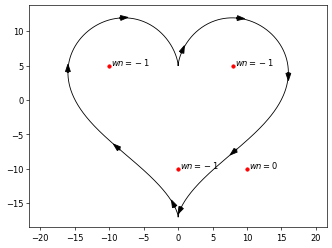

,"(x,y)",WN
0,"(-10, 5)",-1
1,"(8, 5)",-1
2,"(0, -10)",-1
3,"(10, -10)",0


In [16]:
APCclass.wnplot([(-10,5), (8,5), (0,-10), (10,-10)], n_arrows=9)

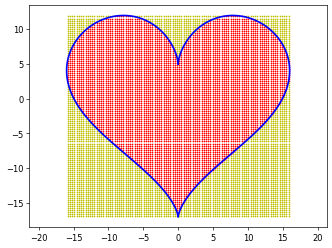



Cartesian product method
with a grid of 100 x 100:
Area = 566.799
Elapsed time = 145.553 sec


(566.7993646859989, 145.5533332824707)

In [5]:
APCclass.calculate_area(N=(100,100), method='grid')

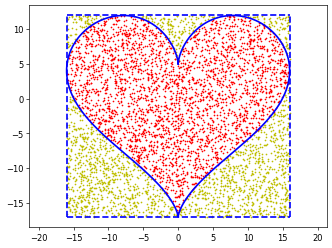



Montecarlo method with N = 5000:
Area = 565.689
Elapsed time = 77.2709 sec


(565.6887192947133, 77.27085638046265)

In [6]:
APCclass.calculate_area(N=5000, method='montecarlo')

__4.2. Caso #2: Hipocicloide (7, 1)__

In [17]:
APCclass = AreaParametricCurve(
           PCname='hypocycloid',
           PCparameters=(7, 1),
           size=(100,100),
           N_MC=10000,
           plot_colors={'line':'k',
                        'inside':'y',
                        'outside':'g'}
                               )
print(APCclass)

The parametric curve is "hypocycloid" 
with parameters (7, 1).

Area enclosed calculated via
(1/2)*integral(xdy - ydx):
Area = 94.2478
 

Cartesian product method
with a grid of 100 x 100 cells:
Area = 94.4063
Relative deviation = 0.168245 percent
Elapsed time = 196.772 sec

Montecarlo method with N = 10000:
Area = 94.2974
Relative deviation = 0.0526213 percent
Elapsed time = 195.775 sec


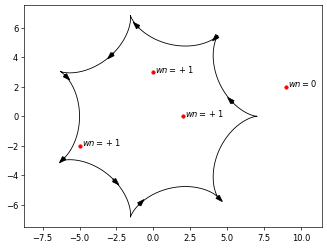

,"(x,y)",WN
0,"(-5, -2)",1
1,"(2, 0)",1
2,"(0, 3)",1
3,"(9, 2)",0


In [18]:
APCclass.wnplot([(-5, -2), (2, 0), (0, 3), (9, 2)], n_arrows=9)

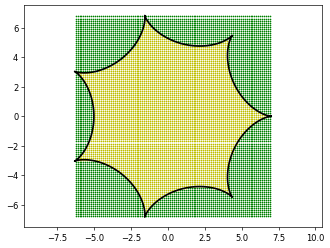



Cartesian product method
with a grid of 100 x 100:
Area = 94.4063
Elapsed time = 209.057 sec


(94.40634635399131, 209.05741453170776)

In [9]:
APCclass.calculate_area(N=(100,100), method='grid')

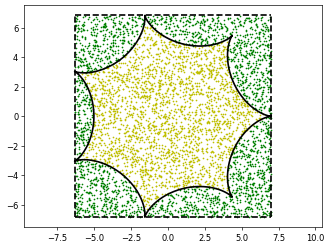



Montecarlo method with N = 5000:
Area = 92.7354
Elapsed time = 104.641 sec


(92.73543756896491, 104.64130163192749)

In [10]:
APCclass.calculate_area(N=5000, method='montecarlo')

__4.3. Caso #3: Un polígono simple de 6 vértices__

In [11]:
APCclass = AreaParametricCurve(
           PCname='polygon',
           PCparameters=[(0,0),(2,0),
                         (3,1),(1.5,2),
                         (0.5,1.5),(2,1)],
           size=(100,100),
           N_MC=10000,
           plot_colors={'line':'k',
                        'inside':'b',
                        'outside':'y'}
                               )
print(APCclass)

The parametric curve is "polygon" 
with parameters [(0, 0), (2, 0), (3, 1), (1.5, 2), (0.5, 1.5), (2, 1), (0, 0)].

Area enclosed calculated via
(1/2)*sum(x[i]y[i+1]-x[i+1]y[i]):
Area = 2.625
 

Cartesian product method
with a grid of 100 x 100 cells:
Area = 2.63239
Relative deviation = 0.281418 percent
Elapsed time = 209.581 sec

Montecarlo method with N = 10000:
Area = 2.64856
Relative deviation = 0.897482 percent
Elapsed time = 207.72 sec


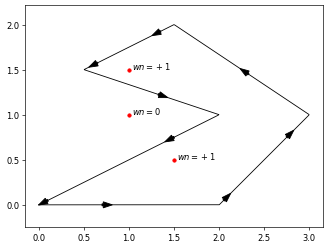

,"(x,y)",WN
0,"(1, 1)",0
1,"(1.5, 0.5)",1
2,"(1, 1.5)",1


In [12]:
APCclass.wnplot([(1,1), (1.5,0.5), (1,1.5)], n_arrows=9)

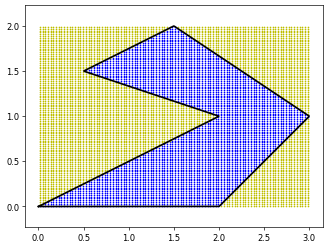



Cartesian product method
with a grid of 100 x 100:
Area = 2.63239
Elapsed time = 224.623 sec


(2.6323872277499993, 224.62346410751343)

In [13]:
APCclass.calculate_area(N=(100,100), method='grid')

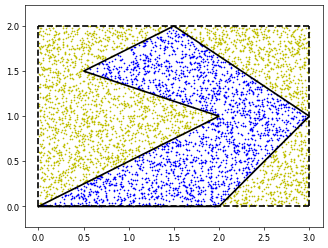



Montecarlo method with N = 5000:
Area = 2.57309
Elapsed time = 107.085 sec


(2.5730911331999993, 107.08505916595459)

In [14]:
APCclass.calculate_area(N=5000, method='montecarlo')

__Análisis de los resultados:__ los casos #1, #2 y #3 corresponden a curvas de Jordan porque son curvas simples, es decir, sin auto-intersecciones, por lo que las áreas calculadas con el método del barrido del mallado (producto cartesiano) y el método de Montecarlo, coinciden con los valores calculados con la integral de línea del área (teorema de Green) o con _shoelace formula_ (en el caso del polígono), cuyos resultados numéricos se desvían como máximo 1% con respecto a los valores exactos usando 10000 puntos. En el caso #1 (curva "corazón") el valor exacto del área es $180 \pi$ y en el caso #2 (curva hipocicloide (7, 1)) es $30 \pi$ (ver Apéndice A). 


__4.4. Caso #4: Lemniscate de Bernoulli__

Aquí empezamos con las curvas que tienen auto-intersecciones. Esta curva paramétrica (_lemniscatus_ en Latín) fue descrita en el año 1694 por Jakob Bernoulli como una modificación de la elipse, el cual es el lugar geométrico de los puntos $(x,y)$ donde el producto de las distancias a cada uno de los dos focos ubicados en $(\pm c,0)$ es constante e igual a $c^2$. Fácilmente esto se puede traducir en el plano complejo como:

$|z - c| |z + c| = c^2 \tag{30a}$

su ecuación cartesiana es

$(x^2 + y ^2) ^2 = 2c^2 (x^2 - y^2) \tag{30b}$

y su ecuación en coordenadas polares es

$r ^2 = a^2 \cos (2 \theta) \tag{30c}$

la relación entre las constantes $a$ y $c$ es $a^2 = 2 c^2$. No es difícil demostrar que el área de esta región es igual a $a^2$, que se obtiene mediante la Ecuación (3) en coordenadas polares, sustituyendo (30c) e integrando en $\theta$ de $0$ a $\pi/4$ y multiplicando por 4 al ser simétrica.



In [5]:
APCclass = AreaParametricCurve(
           PCname='lemniscate',
           PCparameters=2,
           size=(100,100),
           N_MC=10000,
           plot_colors={'line':'k',
                        'inside':'b',
                        'outside':'y'}
                               )
print(APCclass)

The parametric curve is "lemniscate" 
with parameters 2.

Area enclosed calculated via
(1/2)*integral(xdy - ydx):
Area = 8.75829e-16
 

Cartesian product method
with a grid of 100 x 100 cells:
Area = 4.00053
Relative deviation = 4.5677e+17 percent
Elapsed time = 120.286 sec

Montecarlo method with N = 10000:
Area = 4.0141
Relative deviation = 4.5832e+17 percent
Elapsed time = 121.001 sec


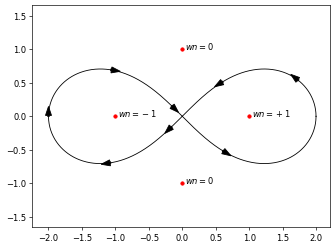

,"(x,y)",WN
0,"(-1, 0)",-1
1,"(1, 0)",1
2,"(0, -1)",0
3,"(0, 1)",0


In [7]:
APCclass.wnplot([(-1,0), (1,0), (0,-1), (0,1)], n_arrows=8)

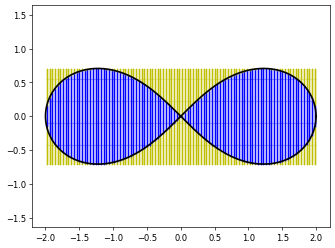



Cartesian product method
with a grid of 100 x 100:
Area = 4.00053
Elapsed time = 131.618 sec


(4.000526657213614, 131.61843848228455)

In [8]:
APCclass.calculate_area(N=(100,100), method='grid')

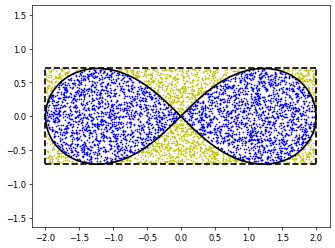



Montecarlo method with N = 5000:
Area = 4.00845
Elapsed time = 67.6455 sec


(4.00844625184045, 67.64546370506287)

In [9]:
APCclass.calculate_area(N=5000, method='montecarlo')

__4.5. Caso #5: Pétalos (5, 1)__

In [14]:
APCclass = AreaParametricCurve(
           PCname='petals',
           PCparameters=(5,1),
           size=(100,100),
           N_MC=10000,
           plot_colors={'line':'r',
                        'inside':'g',
                        'outside':'y'}
                               )
print(APCclass)

The parametric curve is "petals" 
with parameters (5, 1).

Area enclosed calculated via
(1/2)*integral(xdy - ydx):
Area = 1.5708
 

Cartesian product method
with a grid of 100 x 100 cells:
Area = 0.831169
Relative deviation = 47.0861 percent
Elapsed time = 419.155 sec

Montecarlo method with N = 10000:
Area = 0.824935
Relative deviation = 47.483 percent
Elapsed time = 401.11 sec


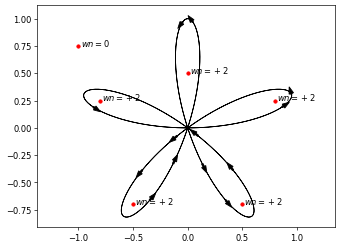

,"(x,y)",WN
0,"(0, 0.5)",2
1,"(-0.8, 0.25)",2
2,"(0.8, 0.25)",2
3,"(-0.5, -0.7)",2
4,"(0.5, -0.7)",2
5,"(-1, 0.75)",0


In [15]:
APCclass.wnplot([(0,1/2),(-0.8,0.25),
                 (0.8,0.25),(-0.5,-0.7),
                 (0.5,-0.7),(-1,0.75)],
                 n_arrows=13)

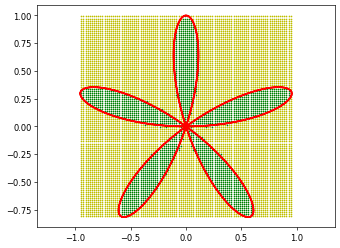



Cartesian product method
with a grid of 100 x 100:
Area = 0.831169
Elapsed time = 414.811 sec


(0.8311690783037996, 414.8105068206787)

In [16]:
APCclass.calculate_area(N=(100,100), method='grid')

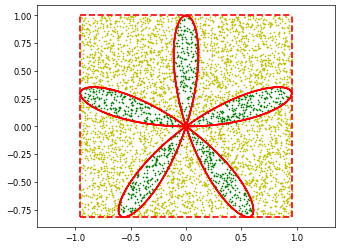



Montecarlo method with N = 5000:
Area = 0.811775
Elapsed time = 206.569 sec


(0.8117751331433777, 206.56864857673645)

In [17]:
APCclass.calculate_area(N=5000, method='montecarlo')

__4.6. Caso #6: Star5__

In [18]:
APCclass = AreaParametricCurve(
           PCname='star5',
           PCparameters=None,
           size=(100,100),
           N_MC=10000,
           plot_colors={'line':'k',
                        'inside':'y',
                        'outside':'b'}
                               )
print(APCclass)

The parametric curve is "star5" 
with parameters None.

Area enclosed calculated via
(1/2)*integral(xdy - ydx):
Area = 273.319
 

Cartesian product method
with a grid of 100 x 100 cells:
Area = 215.029
Relative deviation = 21.3267 percent
Elapsed time = 204.34 sec

Montecarlo method with N = 10000:
Area = 212.26
Relative deviation = 22.3398 percent
Elapsed time = 203.621 sec


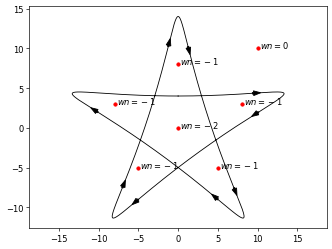

,"(x,y)",WN
0,"(0, 0)",-2
1,"(8, 3)",-1
2,"(-8, 3)",-1
3,"(0, 8)",-1
4,"(-5, -5)",-1
5,"(5, -5)",-1
6,"(10, 10)",0


In [19]:
APCclass.wnplot([(0,0),(8,3),(-8,3),(0,8),
             (-5,-5),(5,-5),(10,10)],
              n_arrows=9)

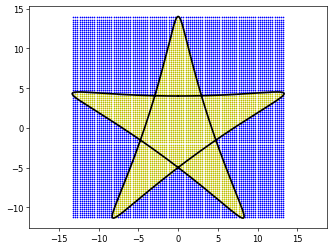



Cartesian product method
with a grid of 100 x 100:
Area = 215.029
Elapsed time = 217.588 sec


(215.02876243604734, 217.58846974372864)

In [20]:
APCclass.calculate_area(N=(100,100), method='grid')

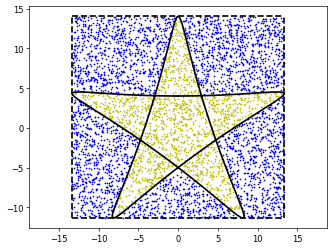



Montecarlo method with N = 5000:
Area = 216.515
Elapsed time = 108.474 sec


(216.51451393529138, 108.47400617599487)

In [21]:
APCclass.calculate_area(N=5000, method='montecarlo')

__4.7. Caso #7: Fórmula general (4, 1, 4, 1, 1, 1, 3, 3)__

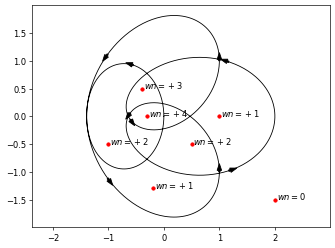

,"(x,y)",WN
0,"(1, 0)",1
1,"(0.5, -0.5)",2
2,"(-1, -0.5)",2
3,"(2, -1.5)",0
4,"(-0.2, -1.3)",1
5,"(-0.4, 0.5)",3
6,"(-0.3, 0)",4


In [22]:
APCclass = AreaParametricCurve(
           PCname='general_form',
           PCparameters=(4, 1, 4, 1, 1, 1, 3, 3),
           size=(100,100),
           N_MC=10000,
           plot_colors={'line':'b',
                        'inside':'c',
                        'outside':'g'}
                               )

APCclass.wnplot([(1,0),(0.5,-0.5),
                 (-1,-0.5),(2,-1.5),
                 (-0.2,-1.3),(-0.4,0.5),
                 (-0.3,0)],
                 n_arrows=9)

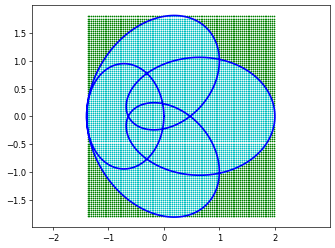



Cartesian product method
with a grid of 100 x 100:
Area = 8.60587
Elapsed time = 240.103 sec


(8.605871900637919, 240.10345196723938)

In [23]:
APCclass.calculate_area(N=(100,100), method='grid')

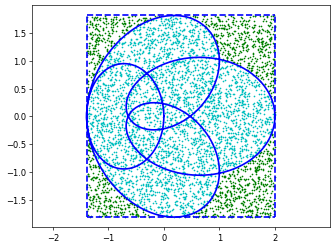



Montecarlo method with N = 5000:
Area = 8.57139
Elapsed time = 121.096 sec


(8.57138930000571, 121.09596681594849)

In [24]:
APCclass.calculate_area(N=5000, method='montecarlo')


Area = 8.605872

Elapsed time = 234.323 sec




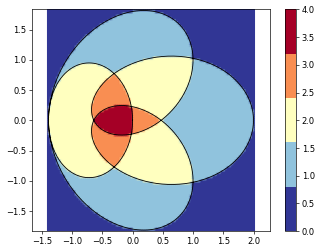

,Area
WN,
1,4.60096
2,3.11575
3,0.63547
4,0.25369


In [25]:
APCclass.wnplot()

__4.8. Caso #8: Polígono simple vs polígono con auto-intersecciones__


Area = 8.978400

Elapsed time = 236.395 sec




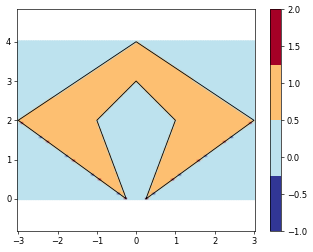

,Area
WN,
-1,0.01920
1,8.93520
2,0.02400


In [28]:
APCclass = AreaParametricCurve(
           PCname='polygon',
           PCparameters=[(0.25,0),(3,2),
                         (0,4),(-3,2),
                         (-0.25,0),(-1,2),
                         (0,3), (1,2)],
           size=(150,150)
                               )

APCclass.wnplot()


Area = 8.757600

Elapsed time = 230.213 sec




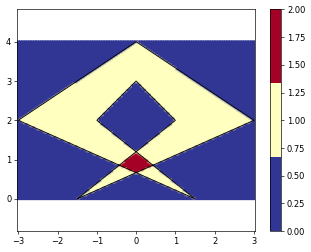

,Area
WN,
1,8.53200
2,0.22560


In [29]:
APCclass = AreaParametricCurve(
           PCname='polygon',
           PCparameters=[(-1.5,0),(3,2),
                         (0,4),(-3,2),
                         (1.5,0),(-1,2),
                         (0,3), (1,2)],
           size=(100,100)
                               )

APCclass.wnplot()

__4.8. Caso #8: Fórmula general (3, 1, 2, 1, 1, 1, 2, 3)__


Area = 2.605358

Elapsed time = 213.078 sec




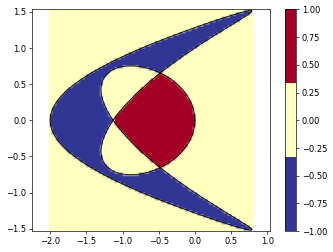

,Area
WN,
-1,1.69348
1,0.91188


In [29]:
APCclass = AreaParametricCurve(
           PCname='general_form',
           PCparameters=(3, 1, 2, 1, 1, 1, 2, 3)
                               )
APCclass.wnplot()

__4.9. Caso #9: Fórmula general (1, 3, 1, 4, 1, 1, 3, 4)__


Area = 4.961757

Elapsed time = 417.714 sec




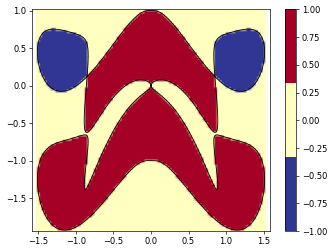

,Area
WN,
-1,0.91550
1,4.04626


In [43]:
APCclass = AreaParametricCurve(
           PCname='general_form',
           PCparameters=(1, 3, 1, 4, 1, 1, 3, 4)
                            )
APCclass.wnplot()

__4.10. Caso #10: Fórmula general (1, 3, 1, 2, 1, 1, 3, 3)__


Area = 3.893616

Elapsed time = 262.05 sec




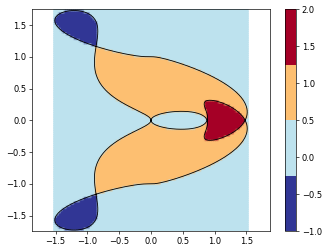

,Area
WN,
-1,0.51441
1,3.09900
2,0.28021


In [32]:
APCclass = AreaParametricCurve(
           PCname='general_form',
           PCparameters=(1, 3, 1, 2, 1, 1, 3, 3)
                               )
APCclass.wnplot()


Area = 3.508784

Elapsed time = 371.703 sec




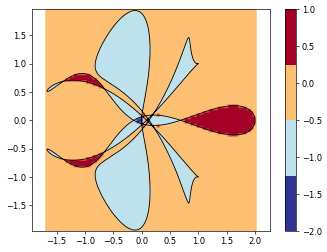

,Area
WN,
-2,0.01136
-1,2.91783
1,0.57959


In [34]:
APCclass = AreaParametricCurve(
           PCname='general_form',
           PCparameters=(4, -3, -3, 4, 1, 1, 3, 3)
                            )
APCclass.wnplot()


Area = 3.836473

Elapsed time = 290.082 sec




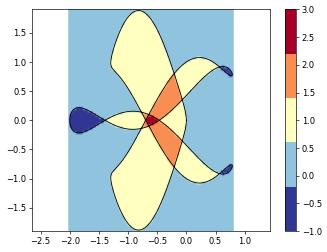

,Area
WN,
-1,0.20148
1,3.16698
2,0.44493
3,0.02309


In [37]:
APCclass = AreaParametricCurve(
           PCname='general_form',
           PCparameters=(-3, -1, 2, -3, 1, 1, 2, 3)
                            )
APCclass.wnplot()


Area = 6.303412

Elapsed time = 428.429 sec




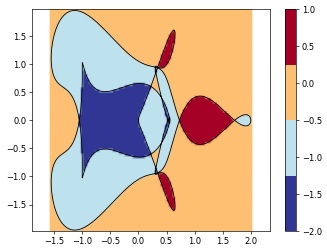

,Area
WN,
-2,1.41279
-1,4.17729
1,0.71333


In [35]:
APCclass = AreaParametricCurve(
           PCname='general_form',
           PCparameters=(-2, 3, -2, 5, 1, 1, 3, 3)
                            )
APCclass.wnplot()


Area = 2.232374

Elapsed time = 325.007 sec




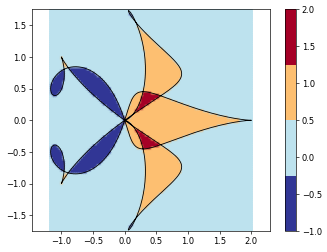

,Area
WN,
-1,0.57787
1,1.55343
2,0.10107


In [41]:
APCclass = AreaParametricCurve(
           PCname='general_form',
           PCparameters=(-2, 3, -2, 3, 3, 3, 3, 3)
                            )
APCclass.wnplot()


Area = 3.899375

Elapsed time = 456.797 sec




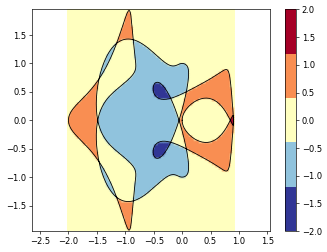

,Area
WN,
-2,0.11667
-1,2.50610
1,1.26988
2,0.00673


In [36]:
APCclass = AreaParametricCurve(
           PCname='general_form',
           PCparameters=(1, 3, 3, 4, 1, 1, 4, 5)
                            )
APCclass.wnplot()


Area = 3.703100

Elapsed time = 448.783 sec




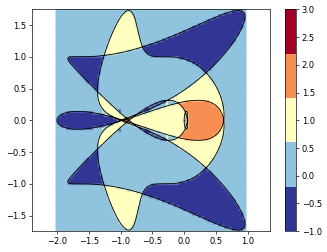

,Area
WN,
-1,2.01597
1,1.34807
2,0.33702
3,0.00204


In [10]:
APCclass = AreaParametricCurve(
           PCname='general_form',
           PCparameters=(5, 4, 2, 4, 1, 1, 2, 3)
                               )
APCclass.wnplot()


Area = 4.403686

Elapsed time = 441.304 sec




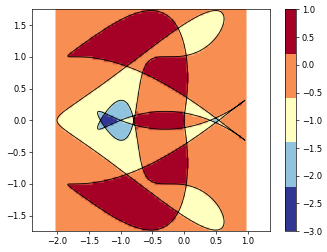

,Area
WN,
-3,0.03472
-2,0.19200
-1,1.83623
1,2.34073


In [11]:
APCclass = AreaParametricCurve(
           PCname='general_form',
           PCparameters=(5, -4, 2, -4, 1, 1, 2, 3)
                               )
APCclass.wnplot()


Area = 3.848587

Elapsed time = 475.025 sec




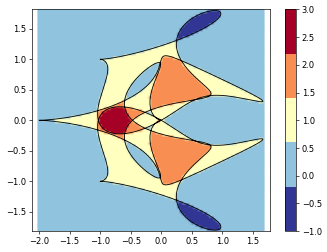

,Area
WN,
-1,0.30841
1,2.22480
2,1.14403
3,0.17134


In [33]:
APCclass = AreaParametricCurve(
           PCname='general_form',
           PCparameters=(5, 4, 1, 4, 3, 3, 3, 3)
                               )
APCclass.wnplot()


Area = 4.506005

Elapsed time = 427.214 sec




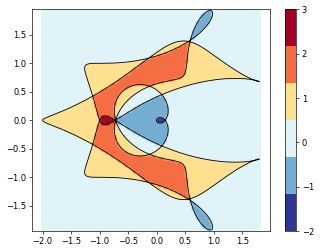

,Area
WN,
-2,0.00878
-1,0.61778
1,2.43307
2,1.41709
3,0.02928


In [40]:
APCclass = AreaParametricCurve(
           PCname='general_form',
           PCparameters=(5, 4, 1, 4, 1, 1, 3, 3)
                            )
APCclass.wnplot()


Area = 5.602058

Elapsed time = 610.931 sec




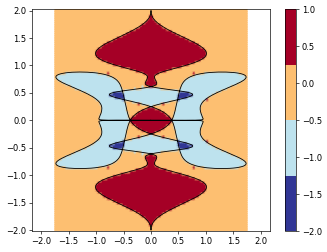

,Area
WN,
-2,0.10539
-1,2.79826
1,2.69842


In [42]:
APCclass = AreaParametricCurve(
           PCname='general_form',
           PCparameters=(1, 7, 1, 3, 3, 3, 5, 5)
                            )
APCclass.wnplot()


Area = 5.639203

Elapsed time = 651.613 sec




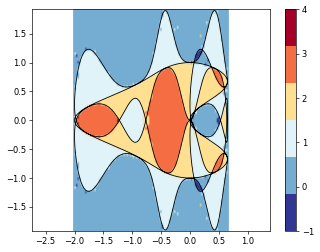

,Area
WN,
-1,0.04637
1,2.91537
2,1.44962
3,1.22381
4,0.00403


In [44]:
APCclass = AreaParametricCurve(
           PCname='general_form',
           PCparameters=(3, 3, 3, 7, 1, 1, 8, 9)
                            )
APCclass.wnplot()


Area = 3.088189

Elapsed time = 1047.41 sec




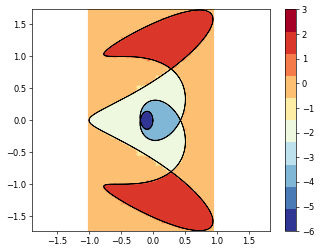

,Area
WN,
-6,0.04155
-5,0.00134
-4,0.24797
-3,0.01072
-2,1.00795
-1,0.07238
1,0.05562
2,1.64998
3,0.00067


In [12]:
APCclass = AreaParametricCurve(
           PCname='general_form',
           PCparameters=(5, -4, -2, -4, 2, 1, 2, 3)
                               )
APCclass.wnplot(size=(100,200))

__Análisis de los resultados:__ 
Los casos #4 en adelante son curvas que se intersectan a sí mismas por lo que el valor del área calculada con la integral de línea y el teorema de Green no proporciona el valor correcto del área (ya que al aplicar el teorema de Green, necesariamente $C$ debe ser una curva de Jordan), por lo que se aplica el método del barrido del mallado y el método de montecarlo para encontrar una aproximación del valor del área encerrada por la curva, y la exactitud de este valor mejora al incrementar el número de puntos $N$ para evaluar la integral del WN. Los casos #8 y #10 (así como algunos casos posteriores) son curvas con auto-intersecciones que tienen "agujeros" que no cuentan para el cálculo del área (ya que WN debe ser distinto de cero). Los tiempos de ejecución del método del barrido del mallado (producto cartesiano) y el método de Montecarlo arrojan valores muy similares al evaluar WN en la misma cantidad de puntos, este tiempo de ejecución es variable dependiendo de la topología de la curva, ya que el cálculo de la integral del WN es computacionalmente muy costoso a medida que el punto $(x_0,y_0)$ esté muy cerca de la curva $C$ ya que puede provocar la divergencia del método numérico.

__5. REFERENCIAS:__

[1] Galbis, Antonio; Maestre, Manuel (2012). Vector Analysis Versus Vector Calculus, Springer-Verlag. ISBN: 1461421993,978-1-4614-2199-3

[2] Courant, Richard; Robbins, Herbert; Stewart, Ian (1996). What is Mathematics? An Elementary Approach to Ideas and Methods, Second Edition. Oxford University Press. pp. 236-240. ISBN 0-19-510519-2

[3] Berg, Gordon O.; Julian, W.; Mines, R.; Richman, Fred (1975). The constructive Jordan curve theorem, _Rocky Mountain Journal of Mathematics_, __5__ (2): pp. 225–236, doi:10.1216/RMJ-1975-5-2-225

[4] Braden, B. (1986). The Surveyor's Area Formula, _The College Mathematics Journal_, __17__ (4): pp. 326-337. doi:10.2307/2686282

[5] Basener, William F. (2006). Topology and its Applications, John Wiley & Sons, Inc.  pp. 164-172. ISBN-13 978-0-471-68755-9

[6] Freitag, Eberhard;  Busam, Rolf (2005). Complex Analysis, Springer-Verlag. pp. 51-194. ISBN-13 978-3-540-25724-0

[7] Fornberg, Bengt (1988). Generation of Finite Difference Formulas on Arbitrarily Spaced Grids, _Mathematics of Computation_ __51__ (184): pp. 699-706, ISSN 0025-5718, doi:10.1090/S0025-5718-1988-0935077-0

[8] Squire, W.; Trapp, G. (1998).
Using complex variables to estimate derivatives of real functions _SIAM J. Online_, __40__ (1): pp. 110-112

[9] https://en.m.wikipedia.org/wiki/Hypocycloid

[10] https://en.m.wikipedia.org/wiki/Lemniscate_of_Bernoulli

[11] https://es.m.wikipedia.org/wiki/Ecuaci%C3%B3n_param%C3%A9trica

__6. APÉNDICE A. Ejemplo de cálculo simbólico con sympy del cálculo del área de la hipocicloide (7, 1) y el corazón__

In [1]:
from sympy import *
# declaramos 't' como la única variable
# simbólica usando el comando symbols().
# la derivada se calcula mediante
# diff(función, variable_independiente)
# y la integral en el intervalo [a, b]
# con
# integrate(función, (var_independiente, a, b))

# hipocicloide(7, 1)
a, b = 7, 1

t = symbols('t')
w = 2*pi
d = a - b
X = d*cos(w*t) + cos(d/b*w*t)
Y = d*sin(w*t) - sin(d/b*w*t)
fun = X*diff(Y, t) - Y*diff(X, t)
A = (1/2)*integrate(fun, (t, 0, 1))
A

30.0*pi

In [2]:
# corazon(1)
a = 1
X = 16*a*(sin(w*t))**3
Y = a*(13*cos(w*t) - 5*cos(2*w*t) - 2*cos(3*w*t) - cos(4*w*t))
fun = X*diff(Y, t) - Y*diff(X, t)
A = (1/2)*integrate(fun, (t, 0, 1))
A
# (el signo negativo indica que está recorrida en sentido horario)

-180.0*pi